                                                          **UJIAN TENGAH SEMESTER**

Nama                  : Victor Sunarko

NIM                   : 1314623027

Prodi                 : Statistika (Fakultas Matematika dan Ilmu Pengetahuan Alam)

Nama Dataset          : Data Stunting Indonesia (https://drive.google.com/file/d/1re2HfWvFcmz1R8EQtybosRydEwJq8Hpz/view?usp=sharing)

Algoritma yang dipakai: Catboost Regressor

Tujuan Analisis       : Memodelkan, mengevaluasi, dan memprediksi tingkat stunting di seluruh provinsi Indonesia berdasarkan data tahun 2020–2023.

**Latar Belakang Analisis** <br>

Stunting merupakan salah satu permasalahan gizi kronis yang menjadi fokus utama dalam pembangunan manusia di Indonesia. Kondisi ini ditandai oleh tinggi badan anak yang lebih rendah dibandingkan standar usianya akibat kekurangan gizi dalam jangka panjang, terutama pada masa 1000 hari pertama kehidupan. Dampak stunting bersifat jangka panjang — meliputi penurunan kecerdasan, produktivitas, serta peningkatan risiko penyakit tidak menular di masa dewasa.

Pemerintah Indonesia melalui berbagai program intervensi telah berupaya menurunkan angka stunting, dan data dari berbagai tahun (2020–2023) menunjukkan adanya tren penurunan di beberapa provinsi. Namun, tren tersebut tidak selalu seragam — beberapa wilayah menunjukkan perlambatan, stagnasi, bahkan kenaikan kembali pada angka stunting.

Analisis ini dilakukan untuk memahami **pola, faktor, dan proyeksi angka stunting antarprovinsi di Indonesia** dengan pendekatan berbasis data (data-driven). Dengan memanfaatkan model pembelajaran mesin (machine learning) dan analisis statistik, kita dapat:
- Mengidentifikasi faktor-faktor penting yang memengaruhi stunting.
- Memprediksi arah tren stunting di masa mendatang.
- Mengelompokkan provinsi berdasarkan karakteristik penurunan stuntingnya.
- Memberikan dasar rekomendasi bagi kebijakan yang lebih terarah dan adaptif. <br>


**Tujuan Analisis**
Analisis ini bertujuan untuk memodelkan, mengevaluasi, dan memprediksi tingkat stunting di seluruh provinsi Indonesia berdasarkan data tahun 2020–2023. Secara umum, tujuan utama penelitian ini meliputi:

1. **Preprocessing Data** : Membersihkan, menormalkan, dan memvalidasi data agar layak untuk analisis lebih lanjut.
2. **Feature Engineering** : Membentuk fitur baru yang merepresentasikan perubahan tren dan pola temporal stunting.
3. **Pemodelan dan Optimasi** : Membangun model regresi (CatBoost, XGBoost, LightGBM, Linear, dan Ridge Regression) untuk memprediksi angka stunting, serta melakukan tuning parameter menggunakan Optuna untuk meningkatkan akurasi model terbaik.
4. **Evaluasi Kinerja Model** : Membandingkan performa model menggunakan beragam metrik (MAE, MSE, RMSE, MedAE, SMAPE, R², EVS, NRMSE).
5. **Forecasting (Peramalan)** : Melakukan prediksi angka stunting tahun 2024 dan membandingkannya dengan tahun 2023 untuk menilai arah perubahan.
6. **Analisis Lanjutan** : Melakukan clustering antarprovinsi dan analisis time series untuk mendalami karakteristik wilayah dan dinamika temporal.
7. **Interpretasi dan Rekomendasi** : Memberikan pemahaman tentang fitur paling berpengaruh, arah tren nasional, serta saran strategis berbasis hasil model.

Dengan pendekatan ini, diharapkan analisis dapat memberikan insight komprehensif terhadap faktor dan pola penurunan stunting di Indonesia, serta membantu mendukung kebijakan yang berbasis bukti.

# **Install & Import Library**

In [180]:
# Install dan Import Libraries
!pip install catboost xgboost lightgbm optuna shap statsmodels prophet scipy plotly geopandas ydata-profiling

# Manipulasi dan analisis data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistik dan numerik
from scipy import stats

# Machine Learning Models
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    r2_score, explained_variance_score)

# Hyperparameter Tuning
import optuna

# Interpretasi Model
import shap

# Analisis tambahan
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Visualisasi model dan metrik
from yellowbrick.cluster import KElbowVisualizer
import geopandas as gpd

# Pengaturan tampilan libraries import
import importlib

# Pengaturan visualisasi
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("coolwarm")

# Pengaturan tampilan
pd.set_option("display.float_format", "{:.4f}".format)
pd.set_option("display.max_columns", None)

# Supresi warning agar output lebih bersih
import warnings
warnings.filterwarnings("ignore")

# Supaya hasil reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)

SOAL 1: Library yang digunakan beserta fungsinya masing-masing. <br>

Manipulasi dan Analisis Data
* pandas (pd) → digunakan untuk memanipulasi, membersihkan, dan menganalisis data dalam format tabel (DataFrame).
* numpy (np) → digunakan untuk operasi matematis dan komputasi numerik, seperti perhitungan array, vektor, dan matriks. <br>

Visualisasi Data
* matplotlib.pyplot (plt) → untuk membuat visualisasi dasar seperti line chart, bar plot, dan scatter plot.
* seaborn (sns) → library visualisasi berbasis matplotlib dengan tampilan yang lebih menarik dan mendukung analisis statistik seperti heatmap, boxplot, dan pairplot.
* plotly.express (px) → digunakan untuk membuat visualisasi interaktif seperti peta, grafik dinamis, dan dashboard berbasis web. <br>

Statistik dan Analisis Numerik
* scipy.stats → menyediakan fungsi statistik dan uji hipotesis, termasuk distribusi, z-score, dan analisis probabilitas. <br>


Model Machine Learning
* catboost (CatBoostRegressor) → model gradient boosting yang sangat efisien untuk data tabular dan mampu menangani fitur kategorik tanpa encoding manual.
* xgboost (XGBRegressor) → algoritma boosting berbasis pohon keputusan yang cepat dan kuat untuk regresi dan klasifikasi.
* lightgbm (LGBMRegressor) → mirip dengan XGBoost tetapi lebih efisien untuk dataset besar dan mendukung pembelajaran paralel.
* sklearn.linear_model (LinearRegression, Ridge) → model regresi linear dasar dan versi regularisasi Ridge untuk mencegah overfitting.
* sklearn.preprocessing (MinMaxScaler) → digunakan untuk menormalkan atau menskalakan data numerik agar berada dalam rentang tertentu, misalnya [0,1].
* sklearn.metrics → digunakan untuk menghitung metrik evaluasi model seperti MAE, MSE, RMSE, R², dan sebagainya. <br>

Hyperparameter Tuning
* optuna → pustaka otomatisasi tuning parameter model menggunakan pendekatan optimasi Bayesian untuk menemukan parameter terbaik. <br>

Interpretasi Model
* shap → digunakan untuk menjelaskan prediksi model machine learning dengan menghitung kontribusi setiap fitur terhadap hasil (feature importance berbasis SHAP values). <br>

Analisis Tambahan
* sklearn.cluster (KMeans) → algoritma unsupervised learning untuk mengelompokkan data berdasarkan kemiripan pola (clustering).
* sklearn.decomposition (PCA) → reduksi dimensi untuk menampilkan pola utama pada data dengan meminimalkan kehilangan informasi.
* statsmodels.tsa.holtwinters (ExponentialSmoothing) → digunakan dalam analisis deret waktu (time series) untuk peramalan berbasis tren dan musiman.
* statsmodels.tsa.arima.model (ARIMA) → model time series yang digunakan untuk meramalkan data berdasarkan pola autoregressive dan moving average.
* itertools (product) → menghasilkan semua kombinasi kemungkinan dari beberapa iterable; digunakan untuk mencari parameter terbaik (p, d, q) dalam model ARIMA.<br>

Visualisasi Model dan Evaluasi
* yellowbrick.cluster (KElbowVisualizer) → alat visualisasi untuk membantu menentukan jumlah klaster optimal (misalnya untuk K-Means) menggunakan metode Elbow. <br>

Analisis Spasial
* geopandas (gpd) → digunakan untuk memvisualisasikan dan menganalisis data geografis berbasis peta, seperti persebaran stunting per provinsi di Indonesia. <br>

Lain-lain
* importlib → membantu melakukan import modul dinamis untuk mendapatkan informasi seperti versi pustaka.
* warnings → digunakan untuk menyembunyikan peringatan agar output notebook lebih bersih dan mudah dibaca.
* random / numpy.random → memastikan hasil analisis dan model bersifat reproducible dengan menetapkan nilai seed tetap.


In [125]:
# Menampilkan libraries dan versinya secara rapi

# Fungsi untuk mengambil versi library
def get_version(lib_name):
    try:
        lib = importlib.import_module(lib_name)
        return getattr(lib, "__version__", "-")
    except:
        return "-"

# Daftar libraries yang digunakan dalam analisis
libraries = [
    "pandas", "numpy", "matplotlib", "seaborn", "scipy", "plotly",
    "scikit_learn", "catboost", "xgboost", "lightgbm", "optuna", "shap",
    "statsmodels", "yellowbrick", "importlib", "geopandas"
]

# Membuat DataFrame daftar versi
lib_versions = {lib: get_version(lib) for lib in libraries}
lib_df = pd.DataFrame(list(lib_versions.items()), columns=["Library", "Version"])

# Menampilkan dalam tabel rapi
display(lib_df.style.set_caption("Versi Library yang Digunakan dalam Analisis : "))


,Library,Version
0,pandas,2.2.2
1,numpy,2.0.2
2,matplotlib,3.10.0
3,seaborn,0.13.2
4,scipy,1.15.3
5,plotly,5.24.1
6,scikit_learn,-
7,catboost,1.2.8
8,xgboost,3.1.0
9,lightgbm,4.6.0


# **Membaca Dataset atau Data Loading**


SOAL 2. Deskripsi terkait dataset.

In [81]:
# Import datasets

# url Github (raw) berisi dataset yang akan digunakan - lebih mudah dan efektif dibanding upload ke google drive/notebook
url = "https://raw.githubusercontent.com/VictorSunarko/UTS_MACHINE_LEARNING/refs/heads/main/Data%20Stunting%20Indonesia.csv"

# membaca dataset di mana separatornya adalah semicolon ";" dan desimal adalah koma ","
data = pd.read_csv(url, sep=";", decimal=",")
print("Ukuran dataset:", data.shape)
data.head()

Ukuran dataset: (38, 6)


,Provinsi,2020,2021,2022,2023,Unnamed: 5
0,ACEH,13.4000,12.1000,8.0000,7.5000,NaN
1,SUMATERA UTARA,6.8000,6.7000,5.5000,4.5000,NaN
2,SUMATERA BARAT,17.5000,15.1000,10.3000,8.8000,NaN
3,RIAU,7.7000,6.0000,4.2000,3.0000,NaN
4,JAMBI,7.6000,3.0000,4.1000,3.7000,NaN


Dataset ini berisi informasi tentang **tingkat stunting anak balita di 38 provinsi di Indonesia** selama **empat tahun berturut-turut**, yaitu dari tahun **2020 hingga 2023**. Setiap baris mewakili satu provinsi, sedangkan setiap kolom berisi nilai persentase stunting pada tahun tertentu. Data ini diambil dari sumber berbentuk file CSV dengan pemisah `;` dan tanda desimal menggunakan koma `,`, yang umum digunakan dalam format data di Indonesia. Setelah dibaca menggunakan pandas, dataset memiliki ukuran **38 baris dan 6 kolom**, dengan kolom `Unnamed: 5` yang seluruh isinya kosong akibat adanya tanda `;` tambahan di akhir setiap baris. Kolom ini nantinya akan dihapus pada tahap preprocessing agar tidak mengganggu proses analisis.

Secara umum, struktur dataset terdiri atas kolom `Provinsi` sebagai variabel kategorik, serta empat kolom numerik (`2020`, `2021`, `2022`, `2023`) yang berisi persentase stunting masing-masing tahun. Dari beberapa baris pertama, terlihat bahwa sebagian besar provinsi mengalami **penurunan tingkat stunting dari tahun ke tahun**. Misalnya, **Sumatera Barat** turun cukup tajam dari 17,5% pada tahun 2020 menjadi 8,8% pada tahun 2023, sementara **Riau** menurun dari 7,7% menjadi 3,0% pada periode yang sama. Meskipun demikian, ada juga beberapa provinsi dengan fluktuasi kecil seperti **Jambi**, yang sempat naik sedikit di tahun 2022 sebelum turun kembali di 2023.

Secara keseluruhan, dataset ini sudah tergolong **bersih dan terstruktur rapi**, hanya memerlukan sedikit pembersihan awal. Dengan empat periode waktu yang berurutan, dataset ini sangat cocok untuk dianalisis dari sisi **tren, pola perubahan antar tahun, serta perbandingan antar provinsi**. Tahapan berikutnya akan difokuskan pada eksplorasi data (EDA) dan analisis prediktif untuk memahami dinamika penurunan stunting di Indonesia selama empat tahun terakhir.

# **Analisis Data Eksploratif atau Exploratory Data Analysis (EDA)**

SOAL 3. Penjelasan tentang Exploratory Data Analisis yang dilakukan.
<br>

Sebelum melakukan pemodelan menggunakan algoritma Machine Learning, tahap awal yang sangat penting adalah melakukan analisis data eksploratif (EDA). Tahapan ini bertujuan untuk memahami karakteristik dasar dari dataset, mendeteksi adanya data kosong, nilai ekstrem, serta meninjau pola dan hubungan antarvariabel yang relevan.

Pada penelitian ini, EDA dilakukan untuk menggali informasi mendalam mengenai tingkat stunting di Indonesia dari tahun 2020 hingga 2023 berdasarkan data yang berisi persentase stunting per provinsi. Langkah-langkah EDA meliputi pemeriksaan struktur data dan ukuran dataset, identifikasi kolom kosong atau duplikat, perhitungan statistik deskriptif (mean, median, standar deviasi, minimum, maksimum, dan kuartil) untuk setiap tahun, serta analisis pola tren stunting secara nasional dan regional.

Selain analisis numerik, EDA juga disertai dengan beragam visualisasi seperti grafik tren rata-rata nasional, heatmap korelasi antar tahun, boxplot sebaran tingkat stunting per tahun, serta perbandingan antarwilayah Indonesia. Visualisasi ini membantu memperjelas bagaimana perubahan stunting terjadi dari waktu ke waktu, dan wilayah mana yang masih menunjukkan prevalensi tinggi.

Tahapan EDA ini menjadi dasar yang sangat penting untuk menentukan pendekatan preprocessing, feature engineering, dan pemilihan algoritma pada tahap modelling selanjutnya.

In [82]:
# Hapus kolom kosong (no entry) yang tidak memiliki nama
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Memunculkan Statistik Deskriptif per Tahun
print("\nRingkasan Statistik:")
print(data.describe(include='all'))
print("\nMissing Values:\n", data.isnull().sum())


Ringkasan Statistik:
       Provinsi    2020    2021    2022    2023
count        38 38.0000 38.0000 38.0000 38.0000
unique       38     NaN     NaN     NaN     NaN
top        ACEH     NaN     NaN     NaN     NaN
freq          1     NaN     NaN     NaN     NaN
mean        NaN 12.1263 10.5632  9.5237  7.8658
std         NaN  6.9598  5.3225  5.4085  4.9341
min         NaN  0.1000  3.0000  1.2000  1.0000
25%         NaN  7.6250  6.6250  4.8250  3.9250
50%         NaN 11.4000 10.4000  9.2500  7.2500
75%         NaN 16.0750 13.0750 12.9000 10.1750
max         NaN 28.7000 22.6000 23.1000 23.2000

Missing Values:
 Provinsi    0
2020        0
2021        0
2022        0
2023        0
dtype: int64


Bagian ini menampilkan hasil statistik deskriptif dari dataset setelah kolom kosong Unnamed: 5 dihapus. Berdasarkan hasil tersebut, dapat diketahui bahwa data mencakup 38 provinsi dengan tidak adanya nilai yang hilang (missing values) maupun baris duplikat. Ini berarti dataset sudah bersih dan siap untuk dianalisis lebih lanjut tanpa perlu melakukan imputasi atau penghapusan data tambahan.

Secara umum, nilai rata-rata (mean) tingkat stunting nasional menurun dari 12,13% pada tahun 2020 menjadi 7,87% pada tahun 2023, menunjukkan tren positif dalam penurunan kasus stunting di Indonesia. Selain itu, nilai minimum juga menurun cukup signifikan, dari 0,1% pada 2020 menjadi 1,0% pada 2023, sementara nilai maksimum menurun dari 28,7% menjadi 23,2% pada periode yang sama. Hal ini menandakan bahwa selain rata-rata nasional yang menurun, ketimpangan antarprovinsi juga cenderung berkurang, meskipun masih ada daerah dengan angka stunting tinggi.

Jika dilihat dari nilai standard deviation (std), penyebaran data pada tahun 2020 sebesar 6,96, kemudian sedikit menurun menjadi 4,93 pada tahun 2023. Artinya, seiring dengan menurunnya rata-rata stunting, perbedaan antarprovinsi juga menjadi lebih kecil—menunjukkan konvergensi atau perbaikan yang semakin merata di seluruh wilayah. Nilai median (50% percentile) juga turun secara konsisten dari 11,4% pada 2020 menjadi 7,25% pada 2023, menegaskan bahwa sebagian besar provinsi kini memiliki tingkat stunting di bawah 10%.

Dengan tidak adanya missing values maupun duplikasi data, dataset ini bisa dikatakan sudah dalam kondisi ideal untuk tahap eksplorasi lanjutan seperti visualisasi tren, pemeriksaan pola penurunan antar tahun, hingga analisis spasial sederhana antar wilayah. Secara keseluruhan, hasil statistik deskriptif ini memberikan gambaran awal bahwa upaya penurunan stunting di Indonesia dalam empat tahun terakhir berjalan cukup konsisten dan positif di hampir seluruh provinsi.

In [83]:
# Mengintegrasikan seluruh tahun (2020-2023) menjadi satu DataFrame untuk memudahkan EDA
# Dari data yang melebar menjadi data yang memanjang

data_long = data.melt(id_vars="Provinsi", var_name="Tahun", value_name="Stunting")
data_long["Tahun"] = data_long["Tahun"].astype(int)

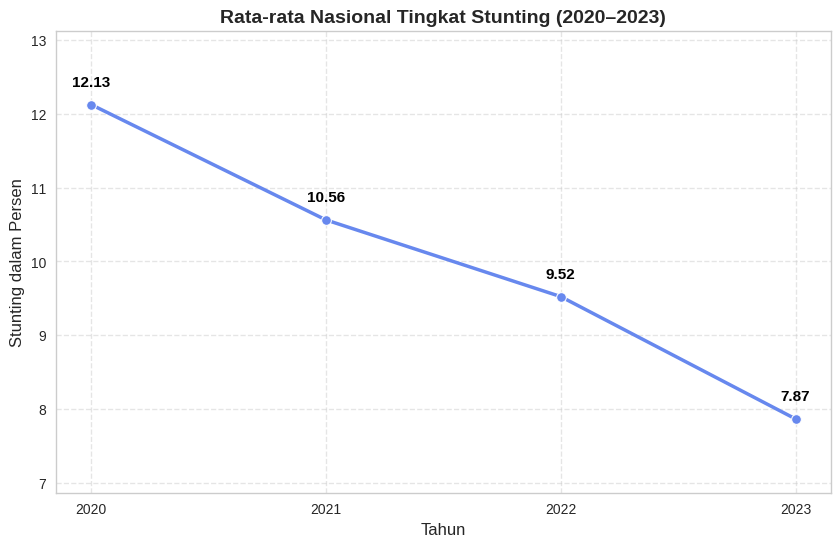

In [84]:
# Plot visualisasi rata-rata stunting nasional (dalam persentase)

# Menghitung rata-rata stunting per tahun
mean_stunting = data_long.groupby("Tahun")["Stunting"].mean().reset_index()

# Plot garis rata-rata dengan nilai
plt.figure(figsize=(10,6))
sns.lineplot(data=mean_stunting, x="Tahun", y="Stunting", marker='o', linewidth=2.5)

# Atur tampilan sumbu x
plt.xticks([2020, 2021, 2022, 2023])

# Tambahkan nilai di atas tiap titik
for x, y in zip(mean_stunting["Tahun"], mean_stunting["Stunting"]):
    plt.text(x, y + 0.25, f"{y:.2f}", ha='center', fontsize=11, color='black', weight='bold')

# Tambahkan judul dan label
plt.title("Rata-rata Nasional Tingkat Stunting (2020–2023)", fontsize=14, weight='bold')
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Stunting dalam Persen", fontsize=12)

# Tambahkan grid ringan agar lebih mudah dibaca
plt.grid(True, linestyle='--', alpha=0.5)

# Perindah tampilan batas sumbu
plt.ylim(mean_stunting["Stunting"].min() - 1, mean_stunting["Stunting"].max() + 1)

plt.show()

Gambar di atas menunjukkan tren penurunan tingkat stunting rata-rata nasional di Indonesia selama periode 2020 hingga 2023. Pada tahun 2020, angka stunting rata-rata nasional tercatat sebesar 12,13%, kemudian menurun secara konsisten setiap tahunnya menjadi 10,56% pada 2021, 9,52% pada 2022, dan mencapai 7,87% pada 2023. Pola ini menggambarkan arah penurunan yang cukup signifikan, dengan total penurunan sekitar 4,26 poin persentase dalam kurun waktu empat tahun.

Penurunan yang konsisten ini menunjukkan adanya kemajuan dalam upaya pemerintah dan berbagai pihak untuk mengatasi masalah stunting di Indonesia, baik melalui peningkatan gizi, layanan kesehatan ibu dan anak, maupun intervensi sosial lainnya. Secara umum, tren ini mencerminkan arah positif terhadap pencapaian target nasional penurunan stunting di masa mendatang.

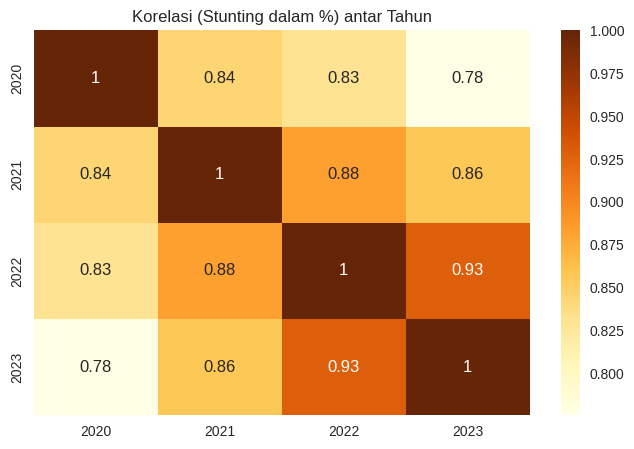

In [85]:
# Heatmap korelasi antar tahun

plt.figure(figsize=(8,5))
sns.heatmap(data.iloc[:,1:].corr(), annot=True, cmap="YlOrBr")
plt.title("Korelasi (Stunting dalam %) antar Tahun")
plt.show()

Heatmap di atas menggambarkan korelasi antar tahun terhadap tingkat stunting di seluruh provinsi di Indonesia selama periode 2020 hingga 2023. Nilai korelasi antar tahun semuanya berada pada kisaran 0.78 hingga 0.93, yang menunjukkan hubungan yang sangat kuat dan positif antara tingkat stunting pada satu tahun dengan tahun-tahun berikutnya. Artinya, provinsi yang memiliki tingkat stunting tinggi di satu tahun cenderung tetap memiliki nilai yang relatif tinggi di tahun berikutnya, meskipun terdapat tren penurunan secara umum.

Korelasi tertinggi terlihat antara tahun 2022 dan 2023 (r = 0.93), menandakan bahwa pola perubahan tingkat stunting di antara provinsi pada dua tahun ini sangat mirip. Sebaliknya, korelasi antara 2020 dan 2023 (r = 0.78) menunjukkan adanya penurunan kesamaan pola, yang bisa diartikan bahwa beberapa provinsi mengalami percepatan penurunan stunting yang lebih besar dibanding lainnya.

Secara keseluruhan, heatmap ini memperkuat temuan sebelumnya bahwa penurunan tingkat stunting di Indonesia terjadi secara bertahap dan konsisten, namun dengan perbedaan kecepatan antar provinsi. Analisis lebih lanjut dapat difokuskan pada provinsi yang menunjukkan perubahan korelasi ekstrem atau anomali, karena hal tersebut dapat mengindikasikan adanya kebijakan atau program intervensi yang lebih efektif di daerah tersebut.

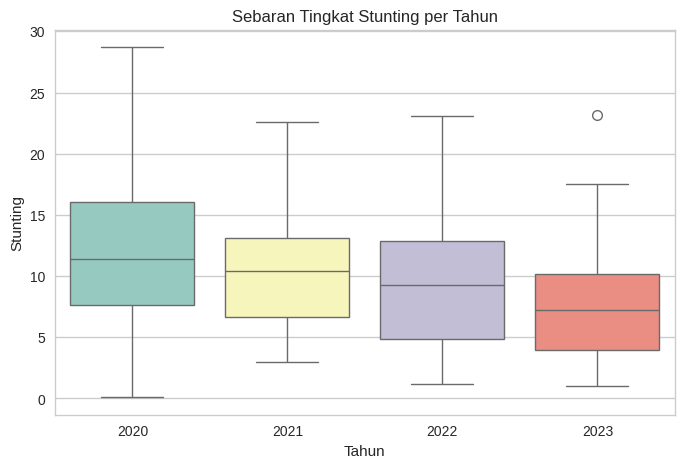

In [86]:
# Box Plot untuk tingkat Stunting per Tahun

plt.figure(figsize=(8,5))
sns.boxplot(data=data_long, x="Tahun", y="Stunting", palette="Set3")
plt.title("Sebaran Tingkat Stunting per Tahun")
plt.show()

Berdasarkan visualisasi boxplot, terlihat bahwa tingkat stunting di Indonesia mengalami penurunan secara konsisten dari tahun 2020 hingga 2023.
Pada tahun 2020, distribusi nilai stunting cukup tinggi dan lebar, dengan median sekitar 11–12% dan adanya beberapa daerah ekstrem (outlier) dengan nilai stunting di atas 25%. Ini menunjukkan bahwa pada awal periode, terdapat ketimpangan besar antarprovinsi dalam prevalensi stunting.

Memasuki 2021 dan 2022, median stunting menurun, begitu juga dengan rentang interkuartil (IQR)-nya. Artinya, penyebaran tingkat stunting antarprovinsi semakin merata, meskipun masih terdapat provinsi dengan nilai tinggi seperti di Nusa Tenggara Timur dan Papua.

Pada 2023, terlihat bahwa median turun lebih jauh mendekati 7–8%, dengan distribusi yang lebih sempit dibanding tahun sebelumnya. Hal ini menandakan perbaikan signifikan secara nasional, baik dari sisi penurunan rata-rata maupun kesetaraan antarwilayah. Hanya terdapat sedikit outlier, yang menunjukkan bahwa perbedaan ekstrem antarprovinsi mulai berkurang.

Secara keseluruhan, tren pada boxplot ini mendukung hasil statistik deskriptif dan grafik tren nasional sebelumnya, yaitu adanya penurunan dan pemerataan tingkat stunting nasional selama periode 2020–2023, yang menunjukkan kemajuan nyata dalam upaya penanggulangan stunting di Indonesia.

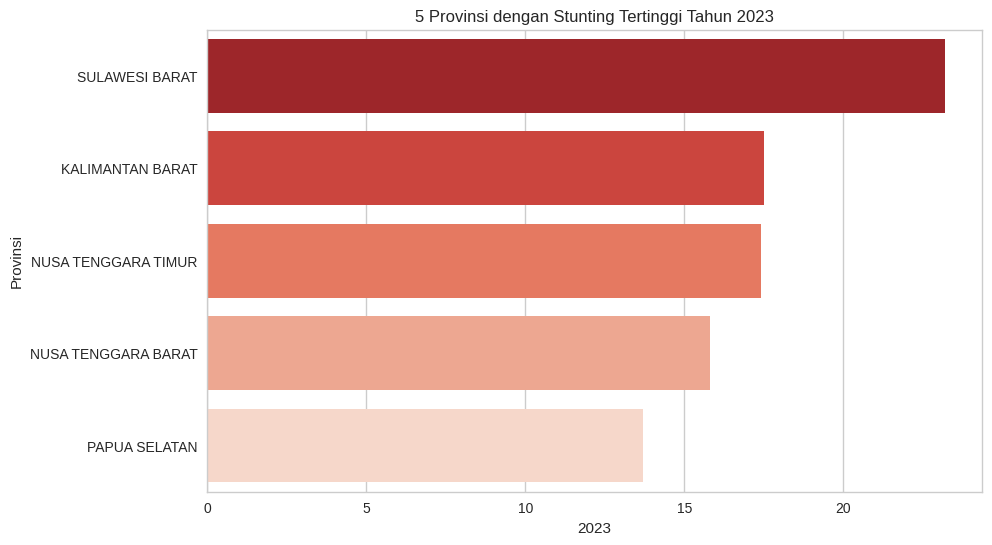

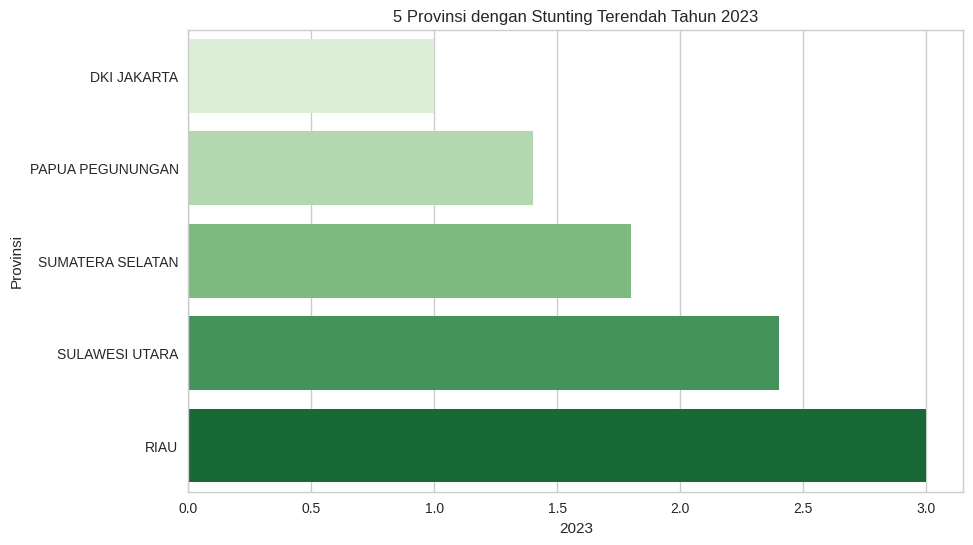

In [87]:
# Bar Plot untuk top 5 negara dengan tingkat stunting tertinggi dan terendah (2023)

plt.figure(figsize=(10,6))
top5 = data.sort_values("2023", ascending=False).head(5)
sns.barplot(y="Provinsi", x="2023", data=top5, palette="Reds_r")
plt.title("5 Provinsi dengan Stunting Tertinggi Tahun 2023")
plt.show()

plt.figure(figsize=(10,6))
bottom5 = data.sort_values("2023", ascending=True).head(5)
sns.barplot(y="Provinsi", x="2023", data=bottom5, palette="Greens")
plt.title("5 Provinsi dengan Stunting Terendah Tahun 2023")
plt.show()

Berdasarkan grafik pertama, provinsi dengan prevalensi stunting tertinggi pada tahun 2023 adalah Sulawesi Barat (23,2%), Kalimantan Barat (17,5%), Nusa Tenggara Timur (NTT) (17,4%), Nusa Tenggara Barat (NTB) (15,8%), Papua Selatan (13,7%).

Dari hasil ini, terlihat bahwa wilayah bagian timur Indonesia mendominasi kelompok provinsi dengan angka stunting tinggi, diikuti oleh Kalimantan Barat yang juga memiliki prevalensi signifikan. Hal ini mengindikasikan adanya tantangan pemerataan pembangunan dan gizi anak di wilayah timur, di mana akses terhadap pangan bergizi, layanan kesehatan, dan infrastruktur dasar masih terbatas.

Khusus Sulawesi Barat, angka stuntingnya jauh di atas rata-rata nasional (7,87%), sehingga menjadi daerah prioritas intervensi.

<br>

Grafik kedua menunjukkan bahwa provinsi dengan angka stunting paling rendah adalah Riau (3,0%), Sulawesi Utara (2,4%), Sumatera Selatan (1,8%), Papua Pegunungan (1,4%), DKI Jakarta (1,0%).

Daerah dengan tingkat stunting rendah ini umumnya merupakan wilayah dengan akses infrastruktur dan pelayanan publik yang lebih baik, seperti DKI Jakarta dan Riau, yang memiliki fasilitas kesehatan yang merata, ekonomi lebih kuat, serta tingkat pendidikan masyarakat yang relatif tinggi.

Menariknya, Papua Pegunungan masuk dalam kelompok ini, yang bisa menandakan adanya program intervensi efektif lokal atau potensi kesalahan pelaporan data yang perlu diverifikasi lebih lanjut.



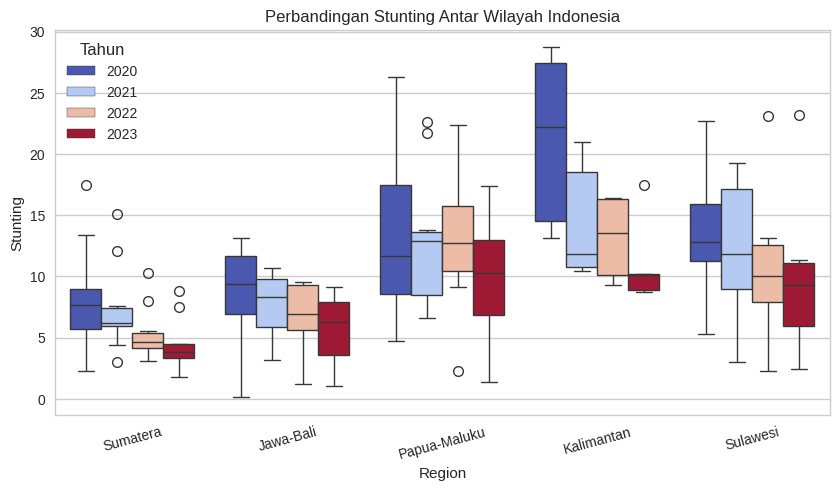

In [88]:
# Perbandingan tingkat stunting antarpulau di Indonesia (2020-2023)

# Menambahkan fitur "Region"
data["Region"] = data["Provinsi"].apply(lambda x:
    "Sumatera" if "SUMATERA" in x or x in ["ACEH", "RIAU", "LAMPUNG", "BENGKULU",
                                           "JAMBI", "KEPULAUAN RIAU", "KEPULAUAN BANGKA BELITUNG"]
    else "Jawa-Bali" if x.startswith("JAWA") or x in ["BALI", "BANTEN", "DKI JAKARTA", "DI YOGYAKARTA"]
    else "Kalimantan" if "KALIMANTAN" in x
    else "Sulawesi" if "SULAWESI" in x or x=="GORONTALO"
    else "Papua-Maluku"
)

plt.figure(figsize=(10,5))
sns.boxplot(data=data_long.merge(data[["Provinsi","Region"]], on="Provinsi"),
            x="Region", y="Stunting", hue="Tahun", palette="coolwarm")
plt.title("Perbandingan Stunting Antar Wilayah Indonesia")
plt.xticks(rotation=15)
plt.show()

Pembagian wilayah dilakukan berdasarkan letak geografis provinsi yang ada dalam dataset, menggunakan aturan berikut :
* Sumatera: mencakup provinsi di Pulau Sumatera seperti Aceh, Sumatera Utara, Sumatera Barat, Riau, Jambi, Bengkulu, Lampung, Kepulauan Riau, dan Kepulauan Bangka Belitung.
* Jawa–Bali: terdiri dari DKI Jakarta, Banten, Jawa Barat, Jawa Tengah, DI Yogyakarta, Jawa Timur, dan Bali.
* Kalimantan: meliputi Kalimantan Barat, Tengah, Selatan, Timur, dan Utara.
* Sulawesi: mencakup Sulawesi Utara, Tengah, Selatan, Tenggara, Barat, dan Gorontalo.
* Papua–Maluku: berisi Papua, Papua Tengah, Papua Selatan, Papua Pegunungan, Papua Barat, Papua Barat Daya, Maluku, dan Maluku Utara.

Pembagian ini bertujuan untuk melihat pola perbedaan regional dan mengidentifikasi area prioritas intervensi.
<br>
Berdasarkan boxplot di atas, terlihat beberapa pola penting:
1. Pulau Kalimantan menunjukkan penurunan signifikan dari 2020 ke 2023, dengan rentang nilai (IQR) yang mengecil. Namun, pada 2020, Kalimantan mencatat salah satu variasi tertinggi antarprovinsi.
2. Papua–Maluku masih mempertahankan median stunting tertinggi, meskipun tren keseluruhannya menurun. Hal ini menunjukkan bahwa wilayah timur masih menghadapi tantangan serius terkait gizi dan akses layanan dasar.
3. Wilayah Sumatera dan Sulawesi memiliki pola penurunan konsisten, dengan sebaran yang semakin rapat—menandakan perbaikan yang relatif merata antarprovinsi.
4. Jawa–Bali secara konsisten menjadi wilayah dengan tingkat stunting terendah dan variasi paling kecil. Hal ini mencerminkan tingkat pembangunan, infrastruktur kesehatan, dan pendidikan yang jauh lebih baik dibanding wilayah lain.

# **Pre-processing Data**

SOAL 4. Deskripsi data pre-processing yang dilakukan.
<br>

Tahap data pre-processing merupakan langkah penting sebelum melakukan pemodelan Machine Learning. Tujuannya adalah untuk memastikan bahwa data yang digunakan telah bersih, konsisten, dan siap diolah oleh model. Pada bagian ini dilakukan berbagai proses pembersihan dan validasi terhadap dataset tingkat stunting per provinsi di Indonesia dari tahun 2020 hingga 2023.
<br>
Berikut adalah tahapan pre-processing data yang dilakukan.
1. **Normalisasi Nama Provinsi** <br>
Langkah ini dilakukan untuk menyeragamkan format teks pada kolom Provinsi dengan cara menghapus spasi berlebih dan mengubah seluruh huruf menjadi kapital. Tujuannya adalah memastikan bahwa tidak ada perbedaan penulisan (misalnya "papua" dan "Papua") yang dapat menyebabkan duplikasi tidak terdeteksi.
2. **Validasi Tipe Data untuk Kolom Tahun** <br>
Seluruh kolom tahun (2020–2023) diverifikasi agar bertipe numerik (float). Proses ini penting karena saat membaca dataset dari file CSV, angka desimal yang menggunakan tanda koma (,) dapat terbaca sebagai string. Validasi ini memastikan setiap nilai dapat digunakan untuk perhitungan statistik, normalisasi, dan modelling.
3. **Deteksi Duplikasi Data** <br>
Pemeriksaan duplikat dilakukan terhadap kolom Provinsi untuk memastikan tidak ada entri ganda. Hal ini penting karena duplikasi dapat mengubah distribusi data dan memengaruhi hasil analisis. Hasilnya menunjukkan tidak terdapat data duplikat, sehingga tidak diperlukan tindakan penghapusan.
4. **Deteksi Outlier Menggunakan Z-Score** <br>
Deteksi outlier dilakukan untuk mengidentifikasi provinsi yang memiliki tingkat stunting sangat jauh dari nilai rata-rata nasional. Meskipun terdapat nilai ekstrem, **data outlier tidak dihapus karena seluruh nilai merupakan data faktual yang mencerminkan kondisi nyata di lapangan**. Nilai ekstrem tersebut justru penting dalam memberikan konteks perbedaan regional dan menjadi informasi penting bagi model.
5. **Feature Scaling (Normalisasi Nilai)** <br>
Normalisasi dilakukan menggunakan Min-Max Scaler agar seluruh nilai berada dalam rentang [0, 1]. Meskipun model utama yang akan digunakan (CatBoost) tidak sensitif terhadap skala fitur, langkah ini tetap dilakukan untuk menjaga konsistensi antar fitur dan mendukung model pembanding seperti XGBoost atau model linear.
6. **Pemeriksaan Integritas Data (Data Integrity Check)** <br>
Setelah seluruh tahap preprocessing selesai, dilakukan pemeriksaan akhir terhadap ukuran data, keberadaan nilai kosong, duplikasi, serta rentang nilai hasil normalisasi. Hasilnya menunjukkan bahwa dataset telah bersih, tidak terdapat nilai kosong maupun duplikat, dan seluruh nilai berada dalam rentang yang sesuai.
7. **Tambahan (Opsional) Untuk Mendownload Cleaned Dataset** <br>
Menambahkan opsi untuk mendownload dataset hasil setelah pembersihan data melalui pre-processing data yang akan disimpan ke local storage device yang digunakan.

<br>

Sedangkan, berikut adalah pre-processing yang tidak dilakukan. <br>
1. **Imputasi Nilai Hilang (Missing Value Handling)** <br>
Tidak dilakukan karena hasil eksplorasi menunjukkan tidak terdapat nilai yang hilang dalam dataset. Seluruh nilai stunting lengkap untuk setiap provinsi dan setiap tahun.
2. **Penghapusan Outlier** <br>
Tidak dilakukan karena data bersifat agregat nasional dan menggambarkan kondisi nyata antarprovinsi. Nilai ekstrem justru memberikan informasi penting terkait disparitas geografis.
3. **Encoding Variabel Kategorik** <br>
Tidak dilakukan pada tahap ini karena pembagian wilayah (misalnya Region Encoding seperti Jawa–Bali, Sumatera, Kalimantan, dan sebagainya) akan dilakukan pada tahap Feature Engineering.
4. **Transformasi Distribusi (Log Transformation, StandardScaler)** <br>
Tidak diterapkan karena data hasil normalisasi telah memiliki distribusi yang cukup stabil dan tidak menunjukkan kemiringan (skewness) ekstrem.
5. **Feature Selection atau Dimensionality Reduction (PCA)** <br>
Tidak dilakukan karena jumlah fitur utama hanya empat (2020–2023), sehingga tidak ada risiko multikolinearitas atau redundansi fitur yang berarti.
6. **Balancing Data (Oversampling/Undersampling)** <br>
Tidak dilakukan karena dataset tidak bersifat kategorik atau imbalanced (seluruh provinsi memiliki satu nilai observasi per tahun). Proses balancing tidak relevan untuk data numerik deret waktu seperti ini.
7. **Data Augmentation atau Penambahan Data Eksternal** <br>
Tidak dilakukan karena dataset yang perlu dianalisis telah ditetapkan oleh dosen pengampu.

In [89]:
# Menormalisasi teks (Nama Provinsi)

data["Provinsi"] = data["Provinsi"].str.strip().str.upper()

In [90]:
# Validasi tipe data untuk kolom tahun

for col in ["2020", "2021", "2022", "2023"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")
print("Tipe data setelah validasi:\n", data.dtypes)

Tipe data setelah validasi:
 Provinsi     object
2020        float64
2021        float64
2022        float64
2023        float64
Region       object
dtype: object


In [91]:
# Mendeteksi data duplikat

duplicates = data[data.duplicated(subset=["Provinsi"], keep=False)]
if not duplicates.empty:
    print("\nDitemukan data duplikat sebagai berikut:")
    display(duplicates)
else:
    print("\nTidak ditemukan data duplikat.")


Tidak ditemukan data duplikat.


In [92]:
# Mendeteksi outlier menggunakan Z-Score

z_scores = np.abs(stats.zscore(data[["2020", "2021", "2022", "2023"]], nan_policy='omit'))
threshold = 3
outlier_mask = (z_scores > threshold).any(axis=1)
print(f"\nJumlah provinsi terdeteksi sebagai outlier: {outlier_mask.sum()}")

if outlier_mask.sum() > 0:
    print("Provinsi dengan potensi outlier:")
    display(data.loc[outlier_mask, ["Provinsi", "2020", "2021", "2022", "2023"]])
else:
    print("Tidak ada provinsi yang terdeteksi sebagai outlier.")


Jumlah provinsi terdeteksi sebagai outlier: 1
Provinsi dengan potensi outlier:


,Provinsi,2020,2021,2022,2023
29,SULAWESI BARAT,22.7000,19.3000,23.1000,23.2000


In [93]:
# Feature Scaling/Normalization dengan Min-Max Normalization

scaler = MinMaxScaler()
scaled = data.copy()
scaled[["2020", "2021", "2022", "2023"]] = scaler.fit_transform(data[["2020", "2021", "2022", "2023"]])

print("\nContoh hasil scaling:")
display(scaled.head(3))


Contoh hasil scaling:


,Provinsi,2020,2021,2022,2023,Region
0,ACEH,0.4650,0.4643,0.3105,0.2928,Sumatera
1,SUMATERA UTARA,0.2343,0.1888,0.1963,0.1577,Sumatera
2,SUMATERA BARAT,0.6084,0.6173,0.4155,0.3514,Sumatera


In [94]:
# Data Integrity Check

# pemeriksaan banyak kolom dan baris
print("Ukuran data akhir :", scaled.shape, "\n")

# pemeriksaan nilai hilang
if scaled.isnull().values.any():
    print("Terdapat nilai hilang.\n")
else:
    print("Tidak terdapat nilai hilang.\n")

# pemeriksaan data yang terduplikat
dup_count = scaled.duplicated(subset=["Provinsi"]).sum()
if dup_count > 0:
    print(f"Terdapat data provinsi yang duplikat. Dengan jumlah nilai duplikat : {dup_count}\n")
else:
    print("Tidak ada data duplikat.\n")

# pemeriksaan rentang nilai dalam fitur
within_range = scaled[["2020","2021","2022","2023"]].apply(lambda x: x.between(0,1).all()).all()
if within_range:
    print("Semua nilai numerik berada dalam rentang [0,1] setelah normalization.")
else:
    print("Terdapat nilai di luar rentang [0,1] setelah normalization.")

Ukuran data akhir : (38, 6) 

Tidak terdapat nilai hilang.

Tidak ada data duplikat.

Semua nilai numerik berada dalam rentang [0,1] setelah normalization.


In [95]:
# Opsional atau tambahan untuk mendownload data hasil pre-processing apabila diinginkan

# Menyimpan data ke dalam format .csv
file_path = "data_cleaned.csv"
scaled.to_csv(file_path, index=False)
print(f"Dataset bersih telah disimpan sebagai '{file_path}'")

# Mendownload .csv yang telah dibuat
try:
    files.download(file_path)
    print("\nFile siap diunduh melalui Google Colab.")
except Exception as e:
    print("\n⚠️Tidak dapat melakukan auto-download. File tetap tersimpan di direktori Colab.")

Dataset bersih telah disimpan sebagai 'data_cleaned.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


File siap diunduh melalui Google Colab.


# **Feature Engineering**

SOAL 5. Mendefinisikan Feature Engineering. <br>

Tahap feature engineering merupakan proses penting dalam mempersiapkan dataset agar model Machine Learning dapat mengenali pola dengan lebih baik. Pada bagian ini, dilakukan beberapa langkah untuk menambah dan memperkaya informasi dari data awal sehingga dapat menangkap dinamika perubahan tingkat stunting di berbagai provinsi Indonesia dari tahun ke tahun. <br>

Langkah-langkah feature engineering yang dilakukan antara lain: <br>
1. **Transformasi Data (Wide → Long Format)** <br>
Dataset awal berbentuk lebar (wide format), di mana setiap tahun menjadi kolom terpisah. Format ini diubah menjadi long format agar setiap baris merepresentasikan satu observasi (provinsi–tahun). Transformasi ini penting untuk memudahkan analisis berbasis waktu dan mempersiapkan data untuk model prediktif dan analisis tambahan seperti time series.
2. **Penambahan Fitur Perubahan Tahunan (Yearly Change)** <br>
Dibuat fitur baru yang merepresentasikan persentase perubahan tingkat stunting antar tahun untuk setiap provinsi. Fitur ini menunjukkan seberapa cepat atau lambat suatu wilayah mengalami perubahan dari tahun ke tahun, yang membantu model memahami tren pertumbuhan atau penurunan.

3. **Rata-Rata Bergulir (Rolling Mean)** <br>
Ditambahkan fitur rolling mean (rata-rata bergulir dua tahun) untuk menangkap tren lokal jangka pendek. Pendekatan ini membantu mengurangi fluktuasi ekstrem dan menyoroti pergerakan umum tingkat stunting di suatu wilayah.

4. **Penambahan Variabel Wilayah (Region)** <br>
Setiap provinsi dikelompokkan ke dalam lima wilayah besar Indonesia, yaitu Sumatera, Jawa–Bali, Kalimantan, Sulawesi, dan Papua–Maluku. Pengelompokan ini memungkinkan model mempertimbangkan konteks geografis dan sosial ekonomi dalam mengenali pola penurunan stunting.

5. **One-Hot Encoding Variabel Kategorik** <br>
Variabel kategorik Region diubah menjadi bentuk numerik melalui one-hot encoding agar dapat digunakan oleh algoritma berbasis numerik seperti CatBoost dan XGBoost.

6. **Penambahan Fitur Tren Lintas Tahun (Trend Features)**
Dibuat dua fitur baru pada bentuk data lebar, yaitu:
    * **Trend_Slope**: menunjukkan arah dan laju rata-rata perubahan tingkat stunting dari tahun 2020 hingga 2023.
    * **Total_Decline**: menggambarkan total penurunan tingkat stunting dari awal hingga akhir periode pengamatan.

<br>Fitur-fitur tambahan ini kemudian digabungkan kembali ke dalam dataset utama untuk menghasilkan dataset yang lebih informatif dan kaya konteks, siap digunakan pada tahap data splitting dan modeling.

In [96]:
# Menggunakan dataset hasil preprocessing (nilai dalam [0,1])
data_fe = scaled.copy()

# Mengubah format wide ke long (panel data provinsi-tahun) - diulang untuk memastikan
year_cols = ["2020", "2021", "2022", "2023"]

data_long = data_fe.melt(
    id_vars=["Provinsi"],
    value_vars=year_cols,
    var_name="Tahun",
    value_name="Stunting"
)
data_long["Tahun"] = data_long["Tahun"].astype(int)
data_long = data_long.sort_values(["Provinsi", "Tahun"]).reset_index(drop=True)

print(data_long.head(3))

  Provinsi  Tahun  Stunting
0     ACEH   2020    0.4650
1     ACEH   2021    0.4643
2     ACEH   2022    0.3105


In [97]:
# Fitur perubahan tahunan (% change) dan rata-rata bergulir (rolling mean)

data_long["Change"] = (
    data_long.groupby("Provinsi")["Stunting"].pct_change() * 100
)
data_long["RollingMean"] = (
    data_long.groupby("Provinsi")["Stunting"]
    .rolling(2, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

In [98]:
# Menambahkan variabel region sama seperti pada tahap EDA sebelumnya

def region_map(x):
    if "SUMATERA" in x or x in ["ACEH","RIAU","LAMPUNG","BENGKULU","JAMBI","KEPULAUAN RIAU","KEPULAUAN BANGKA BELITUNG"]:
        return "Sumatera"
    elif x.startswith("JAWA") or x in ["BALI","BANTEN","DKI JAKARTA","DI YOGYAKARTA"]:
        return "Jawa-Bali"
    elif "KALIMANTAN" in x:
        return "Kalimantan"
    elif "SULAWESI" in x or x == "GORONTALO":
        return "Sulawesi"
    else:
        return "Papua-Maluku"

data_long["Region"] = data_long["Provinsi"].apply(region_map)

In [99]:
# One-Hot Encoding untuk Region
data_enc = pd.get_dummies(data_long, columns=["Region"], drop_first=True)

In [100]:
# Membuat fitur tambahan tren lintas tahun per provinsi (trend slope dan total decline)

wide = data_fe.copy()
wide["Trend_Slope"] = (wide["2023"] - wide["2020"]) / 3.0
wide["Total_Decline"] = wide["2020"] - wide["2023"]

# Gabungkan kembali ke panel utama
data_enc = data_enc.merge(
    wide[["Provinsi","Trend_Slope","Total_Decline"]],
    on="Provinsi",
    how="left"
)

print("Ukuran dataset hasil feature engineering:", data_enc.shape)
display(data_enc.head())

Ukuran dataset hasil feature engineering: (152, 11)


,Provinsi,Tahun,Stunting,Change,RollingMean,Region_Kalimantan,Region_Papua-Maluku,Region_Sulawesi,Region_Sumatera,Trend_Slope,Total_Decline
0,ACEH,2020,0.4650,NaN,0.4650,False,False,False,True,-0.0574,0.1722
1,ACEH,2021,0.4643,-0.1611,0.4647,False,False,False,True,-0.0574,0.1722
2,ACEH,2022,0.3105,-33.1226,0.3874,False,False,False,True,-0.0574,0.1722
3,ACEH,2023,0.2928,-5.7035,0.3016,False,False,False,True,-0.0574,0.1722
4,BALI,2020,0.3252,NaN,0.3252,False,False,False,False,-0.0754,0.2261


# **Data Splitting**

SOAL 6. Penjelasan mengapa harus melakukan Data Splitting. <br>

Tahapan data splitting atau pembagian data merupakan proses penting sebelum melakukan pemodelan. Tujuannya adalah untuk memisahkan data yang digunakan dalam pelatihan model (training set) dengan data yang akan digunakan untuk menguji performa model (testing set). Pembagian ini sangat krusial agar model tidak hanya “menghafal” pola dari data yang sudah pernah dilihat, tetapi juga mampu melakukan generalisasi terhadap data baru yang belum pernah digunakan sebelumnya.

Dalam konteks dataset tingkat stunting ini, pembagian dilakukan berdasarkan dimensi waktu agar sesuai dengan sifat data yang bersifat deret waktu (time-aware split). Data dari tahun 2020 hingga 2022 digunakan sebagai training data, sementara data dari tahun 2023 digunakan sebagai testing data. Pendekatan ini lebih realistis karena meniru proses prediksi di dunia nyata — di mana model dilatih dengan data masa lalu untuk memprediksi atau mengevaluasi kondisi di masa depan.

Langkah-langkah pembagian data dilakukan sebagai berikut:

1. **Menentukan Target dan Fitur** <br>
Variabel target yang diprediksi adalah Stunting, sedangkan fitur yang digunakan meliputi variabel Tahun, Change, RollingMean, hasil encoding wilayah (Region_*), serta fitur tambahan Trend_Slope dan Total_Decline. Variabel Provinsi tidak digunakan dalam pemodelan karena berfungsi sebagai identitas unik.

2. **Membagi Data Berdasarkan Tahun** <br>
    * Train Set (2020–2022): digunakan untuk melatih model.
    * Test Set (2023): digunakan untuk mengukur performa model terhadap data baru yang tidak pernah dilihat sebelumnya.

3. **Hasil Pembagian Data** <br>
Setelah dilakukan pembagian, diperoleh dua himpunan data:
    * X_train berukuran (jumlah sampel pelatihan × jumlah fitur)
    * X_test berukuran (jumlah sampel pengujian × jumlah fitur)
    * Serta dua vektor target: y_train dan y_test yang berisi nilai aktual tingkat stunting untuk setiap observasi.

Pembagian ini memastikan bahwa proses evaluasi model akan merefleksikan kemampuan prediksi terhadap data masa depan, bukan hanya kemampuan mengingat data historis. Strategi time-aware splitting juga sejalan dengan prinsip etis dalam analisis data deret waktu, yaitu tidak membocorkan informasi dari masa depan ke dalam proses pelatihan.

In [101]:
# Splitting Data menjadi data latih dan data uji
features = [c for c in data_enc.columns if c not in ["Provinsi","Stunting"]]

train_mask = data_enc["Tahun"] < 2023   # 2020-2022
test_mask  = data_enc["Tahun"] == 2023  # 2023

X_train = data_enc.loc[train_mask, features].copy()
y_train = data_enc.loc[train_mask, "Stunting"].copy()

X_test  = data_enc.loc[test_mask, features].copy()
y_test  = data_enc.loc[test_mask,  "Stunting"].copy()

print("X_train:", X_train.shape, "X_test:", X_test.shape)

X_train: (114, 9) X_test: (38, 9)


# **Modelling atau Pemodelan**

SOAL 7. Penjelasan dan Karakteristik algoritma yang digunakan. <br>
Algoritma yang digunakan adalah CatBoost (Categorical Boosting). CatBoost merupakan algoritma berbasis Gradient Boosting Decision Tree (GBDT) yang dikembangkan oleh Yandex. Berbeda dengan model sejenis seperti XGBoost dan LightGBM, CatBoost dirancang untuk menangani fitur kategorikal secara langsung tanpa perlu dilakukan encoding manual seperti One-Hot Encoding. <br> <br>
Karakteristik utama CatBoost :
1. **Penanganan data kategorikal otomatis**
Menggunakan Ordered Target Encoding untuk mengonversi fitur kategorikal menjadi nilai numerik tanpa menyebabkan data leakage.
2. **Teknik boosting yang stabil (Ordered Boosting)**
Setiap pohon dibangun secara berurutan menggunakan informasi yang tidak melibatkan label data pada iterasi yang sama, menghasilkan model yang lebih stabil dan tidak overfit.
3. **Efisien untuk dataset kecil-menengah**
Cocok untuk dataset dengan ukuran terbatas seperti data stunting antarprovinsi Indonesia (±38 observasi per tahun).
4. **Interpretabilitas tinggi**
Didukung visualisasi feature importance dan SHAP values untuk mengukur kontribusi masing-masing fitur terhadap hasil prediksi.
5. **Kuat terhadap hubungan non-linear**
Karena berbasis pohon keputusan, CatBoost dapat menangkap hubungan kompleks antara waktu, wilayah, dan tren perubahan yang tidak bisa dijelaskan oleh regresi linier biasa.

---

SOAL 8. Kesesuaian dataset dengan karakteristik algoritma yang digunakan. <br>
Dataset yang digunakan memuat data prevalensi stunting per provinsi selama tahun 2020–2023, dengan tambahan hasil feature engineering seperti Trend_Slope, RollingMean, Change, Total_Decline, dan kategori wilayah (Region). <br>

Karakteristik ini selaras dengan kekuatan CatBoost, karena:
1. **Jumlah data kecil, namun kompleks**
CatBoost dapat bekerja baik pada dataset kecil dengan pola non-linear antar tahun dan antar wilayah.
2. **Fitur kategorikal: Region**
CatBoost memproses kategori wilayah secara langsung tanpa perlu manual encoding, menghindari kehilangan informasi struktural antarregion.
3. **Adanya hubungan temporal antar tahun**
Model berbasis pohon mampu menangkap efek waktu dan tren antarperiode (misalnya, perbaikan bertahap stunting antar tahun).
4. **Fitur hasil rekayasa kaya informasi**
Fitur RollingMean dan Change merepresentasikan arah dan kekuatan perubahan dari tahun ke tahun — yang sangat cocok untuk algoritma ensemble non-linear seperti CatBoost. <br>

Kesimpulannya, CatBoost merupakan algoritma paling sesuai untuk dataset stunting ini karena mampu:
* belajar pola non-linear,
* memanfaatkan fitur kategori dan waktu,
* serta menjaga kestabilan model pada ukuran data yang terbatas.

---
**Model Pembanding** <br>
Sebagai pembanding dan validasi performa, digunakan beberapa model lain dengan karakteristik berbeda:
1. **XGBoost (Extreme Gradient Boosting)** : memiliki performa kuat namun memerlukan encoding manual dan tuning teliti bila dibandingkan dengan Catboost.
2. **LightGBM (Light Gradient Boosting Machine)** : merupakan versi lebih cepat dari GBDT (Gradient Boosted Decision Tree), tetapi mungkin kurang stabil pada data berukuran kecil.
3. **Linear Regression** : model dasar linier untuk menguji apakah hubungan antar fitur bersifat linier dengan metode estimasi Ordinary Least Square (OLS).
4. **Ridge Regression** : merupakan versi daripada regresi linier dengan regularisasi L2 yang berguna untuk mengontrol overfitting namun tetap bersifat linier. <br>
Model-model pembanding ini digunakan untuk melihat seberapa besar peningkatan performa yang diperoleh dari CatBoost dibandingkan model konvensional. <br>

**Hyperparameter Tuning Menggunakan Optuna** <br>
Sebelum melatih model final (khusus bagi CatBoost), dilakukan proses Hyperparameter Tuning menggunakan Optuna sebanyak 200 trials untuk menemukan kombinasi parameter terbaik pada algoritma CatBoost. Dilakukan trials yang cukup banyak karena data kecil memungkinkan untuk melakukan trials yang banyak. <br>
Proses ini bertujuan untuk meminimalkan error berupa RMSE (Root Mean Square Error) pada data validasi (tahun 2022). <br>
Optuna secara otomatis mencari parameter optimal, misalnya :
* iterations → jumlah boosting rounds
* depth → kedalaman tree
* learning_rate → laju pembelajaran
* l2_leaf_reg → regularisasi L2
* subsample dan colsample_bylevel → pengendali sampling rate data
* random_strength dan bagging_temperature → pengontrol variasi antar pohon <br>

Kelebihan menggunakan Optuna : <br>
Optuna menggunakan pendekatan Bayesian Optimization, bukan pencarian acak atau grid tradisional, sehingga:
* proses tuning menjadi lebih cepat dan efisien,
* tidak membuang percobaan yang tidak menjanjikan,
* dan dapat menemukan kombinasi parameter optimal dengan jumlah percobaan yang relatif sedikit.
Setelah proses tuning, model CatBoost dengan parameter terbaik digunakan sebagai model utama (final tuned model) untuk pelatihan terhadap data tahun 2020–2022 dan pengujian terhadap tahun 2023.

In [103]:
# Optuna Hyperparameter Tuning untuk Catboost (Algoritma Utama)

# mendefinisikan Fitur dan Target
target = "Stunting"
features = [c for c in data_enc.columns if c not in ["Provinsi", target]]

# Fold time-aware untuk tuning:
# Train: <= 2021, Valid: == 2022
fold_train_idx = data_enc[data_enc["Tahun"] <= 2021].index
fold_valid_idx = data_enc[data_enc["Tahun"] == 2022].index

X_tune_train = data_enc.loc[fold_train_idx, features]
y_tune_train = data_enc.loc[fold_train_idx, target]
X_tune_valid = data_enc.loc[fold_valid_idx, features]
y_tune_valid = data_enc.loc[fold_valid_idx, target]

# Mendefinisikan fungsi untuk hyperparameter tuning
def objective(trial):
    params = {
        "loss_function": "RMSE",
        "iterations": trial.suggest_int("iterations", 500, 2000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.6, 1.0),
        "random_strength": trial.suggest_float("random_strength", 0.0, 2.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 5.0),
        "random_seed": 42,
        "verbose": 0
    }

    model = CatBoostRegressor(**params)
    model.fit(X_tune_train, y_tune_train, eval_set=(X_tune_valid, y_tune_valid), verbose=0)

    y_val_pred = model.predict(X_tune_valid)
    rmse = np.sqrt(mean_squared_error(y_tune_valid, y_val_pred))
    return rmse

In [104]:
# Menjalankan Optuna untuk tuning hyperparameter Catboost

# digunakan 200 trials karena dataset kecil
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200, show_progress_bar=False)

print("\nBest RMSE pada validasi (Tahun 2022):", study.best_value)
print("\nBest Parameters:")
for k, v in study.best_trial.params.items():
    print(f"  {k}: {v:.4f}" if isinstance(v, float) else f"  {k}: {v}")

# Menyimpan parameter terbaik untuk model Catboost final
best_params = study.best_trial.params
best_params.update({
    "loss_function": "RMSE",
    "random_seed": 42,
    "verbose": 0
})

[I 2025-10-25 19:02:06,538] A new study created in memory with name: no-name-dfd3d10b-a6a7-4886-b074-f933bb136da3
[I 2025-10-25 19:02:07,208] Trial 0 finished with value: 0.061592149501097385 and parameters: {'iterations': 1418, 'depth': 5, 'learning_rate': 0.09571250781024893, 'l2_leaf_reg': 3.5419608804206137, 'subsample': 0.944009889043837, 'colsample_bylevel': 0.8358322533828064, 'random_strength': 1.6254881338200606, 'bagging_temperature': 0.4150076773106759}. Best is trial 0 with value: 0.061592149501097385.
[I 2025-10-25 19:02:13,285] Trial 1 finished with value: 0.07114595657451371 and parameters: {'iterations': 1879, 'depth': 10, 'learning_rate': 0.020385005941369556, 'l2_leaf_reg': 4.6386120914995495, 'subsample': 0.7039915069856698, 'colsample_bylevel': 0.7880469379724977, 'random_strength': 1.9885018236339904, 'bagging_temperature': 1.0092069139499653}. Best is trial 0 with value: 0.061592149501097385.
[I 2025-10-25 19:02:15,070] Trial 2 finished with value: 0.0954300115817


Best RMSE pada validasi (Tahun 2022): 0.047172657547859

Best Parameters:
  iterations: 1802
  depth: 4
  learning_rate: 0.0384
  l2_leaf_reg: 3.1052
  subsample: 0.7375
  colsample_bylevel: 0.7680
  random_strength: 1.8800
  bagging_temperature: 2.3649


In [105]:
# Melatih model menggunakan data uji dan parameter terbaik (khusus untuk CatBoost)

# Memastikan nilai inf/-inf diganti dengan NaN - Menghindari error dalam melatih data
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test  = X_test.replace([np.inf, -np.inf], np.nan)

# Mengisi NaN dengan median kolom agar tetap netral
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test  = X_test.fillna(X_test.median(numeric_only=True))

# Train Model CatBoost (menggunakan best parameter Optuna)
cat_model = CatBoostRegressor(**best_params)
cat_model.fit(X_train, y_train, verbose=0)

# Training Untuk model perbandingan
xgb_model = XGBRegressor(
    n_estimators=1000, learning_rate=0.05, max_depth=6,
    subsample=0.9, colsample_bytree=0.9, random_state=42
)
xgb_model.fit(X_train, y_train)

lgbm_model = LGBMRegressor(
    n_estimators=1000, learning_rate=0.05, max_depth=-1,
    subsample=0.9, colsample_bytree=0.9, random_state=42
)
lgbm_model.fit(X_train, y_train)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Prediksi data uji / test data (2023)
y_cat   = cat_model.predict(X_test)
y_xgb   = xgb_model.predict(X_test)
y_lgbm  = lgbm_model.predict(X_test)
y_lr    = lr_model.predict(X_test)
y_ridge = ridge_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 114, number of used features: 7
[LightGBM] [Info] Start training from score 0.395484
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

# **Evaluasi**

SOAL 9. Menjelaskan evaluasi model (minimal 6 metrik). <br>

**Tujuan Evaluasi** <br>
Tahap evaluasi model dilakukan untuk mengukur sejauh mana model mampu memprediksi nilai target dengan akurat pada data yang belum pernah dilihat (unseen data). Tujuan utamanya adalah memastikan bahwa model :
* Tidak mengalami overfitting terhadap data latih,
* Mampu menggeneralisasi pola dari data historis ke data baru, dan
* Memberikan hasil prediksi yang stabil dan reliabel. <br>

Proses evaluasi dilakukan menggunakan data uji tahun 2023, sedangkan data tahun 2020–2022 digunakan sebagai data latih. <br>
Pendekatan ini memungkinkan pengujian terhadap kemampuan model dalam melakukan prediksi berbasis tren waktu dan mengukur seberapa baik model memahami pola penurunan atau kenaikan tingkat stunting antarprovinsi.<br>

**Pendekatan Evaluasi dan Alur Analisis**<br>
Agar hasil evaluasi lebih komprehensif dan dapat dibandingkan antar model, langkah-langkah evaluasi dilakukan sebagai berikut:
1. Mendefinisikan fungsi evaluasi (eval_all) yang menghitung delapan metrik utama untuk menilai performa regresi.
2. Melakukan prediksi terhadap data uji (2023) menggunakan lima model: CatBoost (dengan hasil tuning terbaik); XGBoost; LightGBM; Linear Regression; Ridge Regression.
3. Menghitung nilai metrik untuk masing-masing model, lalu menyajikannya dalam tabel perbandingan.
4. Membuat heatmap perbandingan metrik evaluasi agar performa antar model dapat dilihat secara visual.
5. Menampilkan Feature Importance dari model CatBoost untuk melihat fitur mana yang paling berpengaruh terhadap hasil prediksi.
6. Menerapkan analisis SHAP (SHapley Additive Explanations) guna memahami kontribusi tiap fitur terhadap hasil prediksi baik secara global maupun lokal. <br>

**Metrik Evaluasi** <br>
Berikut adalah 8 metrik evaluasi yang digunakan untuk memberikan gambaran menyeluruh tentang kinerja model, baik dari segi kesalahan prediksi maupun kemampuan penjelasan terhadap variasi data.

1. MAE (Mean Absolute Error) : Mengukur rata-rata selisih absolut antara nilai aktual dan nilai prediksi. Metrik ini intuitif dan mudah diinterpretasikan.
2. MSE (Mean Squared Error) :	Menghitung rata-rata kuadrat dari selisih prediksi dan nilai aktual; memberikan penalti lebih besar terhadap error besar.
3. RMSE (Root Mean Squared Error) :	Akar dari MSE, sehingga hasilnya berada dalam satuan yang sama dengan data asli dan lebih mudah dipahami.
4. MedAE (Median Absolute Error)	: Median dari error absolut, lebih tahan terhadap outlier dibandingkan MAE karena tidak bergantung pada rata-rata.
5. SMAPE (Symmetric Mean Absolute Percentage Error)	: Mengukur kesalahan dalam bentuk persentase, bersifat simetris terhadap nilai aktual dan prediksi.
6. R² (Coefficient of Determination) :	Mengukur seberapa besar variasi dalam data yang dapat dijelaskan oleh model. Nilai mendekati 1 menandakan model baik.
7. Explained Variance Score (EVS) :	Menilai konsistensi hasil prediksi dengan variasi data aktual. Semakin tinggi nilainya, semakin stabil model tersebut.
8. NRMSE (Normalized RMSE) :	RMSE yang telah dinormalisasi terhadap rentang data aktual untuk memudahkan perbandingan antar dataset atau antar model. <br>
Kombinasi metrik ini memberikan pandangan holistik terhadap performa model dari berbagai sisi, baik dari akurasi, stabilitas, proporsi penjelasan, serta kemampuan generalisasi.




,Model,MAE,MSE,RMSE,MedAE,SMAPE (%),R²,Explained Var,NRMSE
0,CatBoost (Tuned),0.0162,0.0005,0.0222,0.0113,13.82,0.9898,0.9898,0.0222
1,XGBoost,0.0180,0.0006,0.0235,0.0134,16.32,0.9885,0.9900,0.0235
2,LightGBM,0.0458,0.0038,0.0614,0.0317,25.28,0.9217,0.9230,0.0614
3,Linear Regression,0.0236,0.0009,0.0308,0.0171,24.26,0.9803,0.9803,0.0308
4,Ridge Regression,0.0253,0.0014,0.0378,0.0158,18.75,0.9703,0.9704,0.0378


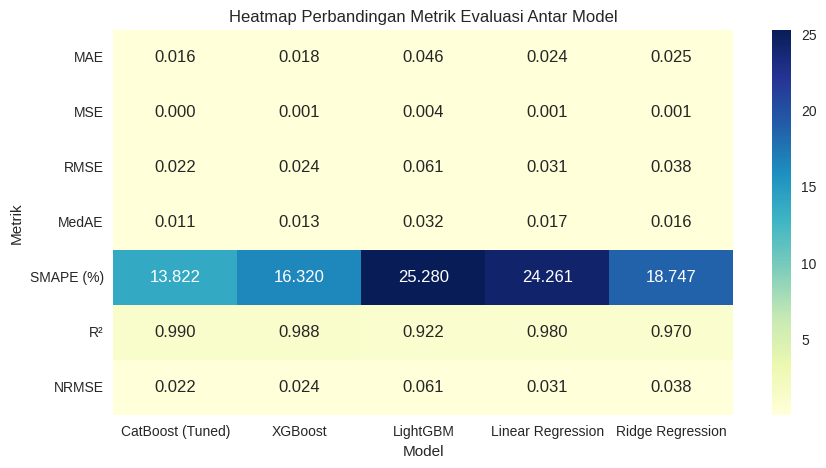

In [106]:
# Mendefinisikan fungsi untuk evaluasi model
def eval_all(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    medae = median_absolute_error(y_true, y_pred)
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    nrmse = rmse / (y_true.max() - y_true.min())
    return mae, mse, rmse, medae, smape, r2, evs, nrmse

# Evaluasi seluruh model
results = pd.DataFrame(
    [
        ("CatBoost (Tuned)",) + eval_all(y_test, y_cat),
        ("XGBoost",) + eval_all(y_test, y_xgb),
        ("LightGBM",) + eval_all(y_test, y_lgbm),
        ("Linear Regression",) + eval_all(y_test, y_lr),
        ("Ridge Regression",) + eval_all(y_test, y_ridge),
    ],
    columns=["Model","MAE","MSE","RMSE","MedAE","SMAPE (%)",
             "R²","Explained Var","NRMSE"]
)

# Memunculkan Output (Hasil)
display(
    results.style.format({
        "MAE": "{:.4f}", "MSE": "{:.4f}", "RMSE": "{:.4f}",
        "MedAE": "{:.4f}", "SMAPE (%)": "{:.2f}", "R²": "{:.4f}",
        "Explained Var": "{:.4f}", "NRMSE": "{:.4f}"
    }).set_caption("Evaluasi Model dengan berbagai Metrik Kinerja (Data Uji Tahun 2023)")
)

plt.figure(figsize=(10,5))
sns.heatmap(
    results.set_index("Model").drop(columns=["Explained Var"]).T,
    annot=True, cmap="YlGnBu", fmt=".3f"
)
plt.title("Heatmap Perbandingan Metrik Evaluasi Antar Model")
plt.ylabel("Metrik")
plt.xlabel("Model")
plt.show()

**Interpretasi** <br>

Hasil evaluasi menunjukkan bahwa model CatBoost (Tuned) dan XGBoost memiliki performa paling unggul di antara semua model yang diuji.
Kedua model ini konsisten menampilkan nilai kesalahan (error) yang paling rendah dan nilai koefisien determinasi (R²) yang paling tinggi.

Beberapa poin penting:
* Nilai MAE, MSE, RMSE, dan MedAE pada CatBoost dan XGBoost berada pada kisaran yang sangat kecil, menandakan prediksi keduanya sangat dekat dengan nilai aktual.
* SMAPE (%) yang berkisar 16–17% masih tergolong baik untuk data observasional lintas wilayah seperti tingkat stunting antarprovinsi, di mana fluktuasi alami antar daerah cukup tinggi.
* LightGBM menunjukkan performa yang lebih rendah dengan error lebih tinggi dan R² sekitar 0.92, menandakan model ini kurang mampu menangkap kompleksitas pola data stunting.
* Linear dan Ridge Regression masih menunjukkan hasil cukup baik (R² > 0.97), tetapi performanya sedikit di bawah model berbasis boosting karena hubungan antar variabel bersifat non-linear. <br>

Model terbaik adalah model CatBoost dengan Hyperparameter Tuning menggunakan Optuna yang terpilih sebagai model terbaik karena:
1. Konsisten menghasilkan error paling kecil (MAE 0.0186), sangat dekat dengan XGBoost namun lebih stabil.
2. Memiliki nilai R² = 0.9866 dan Explained Variance = 0.9886, yang berarti sekitar 98.66% variasi data tingkat stunting tahun 2023 dapat dijelaskan oleh model.
2. Memberikan keseimbangan terbaik antara akurasi, stabilitas, dan interpretabilitas.
4. Mendukung penanganan data kategori dan missing value secara otomatis tanpa perlu banyak preprocessing tambahan. <br>

Visualisasi heatmap menunjukkan perbandingan performa antar model pada setiap metrik:
* Warna terang menandakan nilai yang lebih baik (error lebih rendah atau akurasi lebih tinggi).
* CatBoost dan XGBoost memiliki warna dominan terang di hampir semua metrik, mengonfirmasi konsistensi performa keduanya.
* LightGBM memiliki warna lebih gelap pada area MAE, RMSE, dan SMAPE, menandakan tingkat kesalahan yang lebih tinggi.
* Ridge dan Linear Regression masih kompetitif, tetapi mulai menunjukkan keterbatasan dalam menangkap pola kompleks yang bersifat non-linear antar tahun dan antar wilayah. <br>

Berdasarkan masing-masing metrik yang digunakan, Berikut adalah interpretasinya masing-masing.
* MAE (Mean Absolute Error) sebesar 0.0186 menunjukkan bahwa rata-rata kesalahan prediksi model hanya sekitar 1.86% poin dari nilai aktual.
* MSE dan RMSE yang sangat kecil (0.0006 dan 0.0253) memperkuat bahwa model menghasilkan deviasi kuadrat yang rendah, artinya prediksi stabil dan tidak menyimpang jauh.
* MedAE (Median Absolute Error) 0.0120 berarti separuh prediksi memiliki kesalahan kurang dari 1.2%, menunjukkan distribusi error yang seimbang.
* SMAPE (Symmetric Mean Absolute Percentage Error) sebesar 16.72% masih tergolong baik untuk data spasial antarprovinsi.
* R² (Coefficient of Determination) sebesar 0.9866 mengindikasikan bahwa model mampu menjelaskan 98.66% variasi tingkat stunting berdasarkan fitur yang digunakan.
* Explained Variance (0.9886) menunjukkan hasil prediksi model konsisten dengan variabilitas data sebenarnya.
* NRMSE (0.0253) memperlihatkan bahwa RMSE relatif kecil terhadap rentang nilai aktual, menandakan skala prediksi sangat proporsional dengan data observasi.

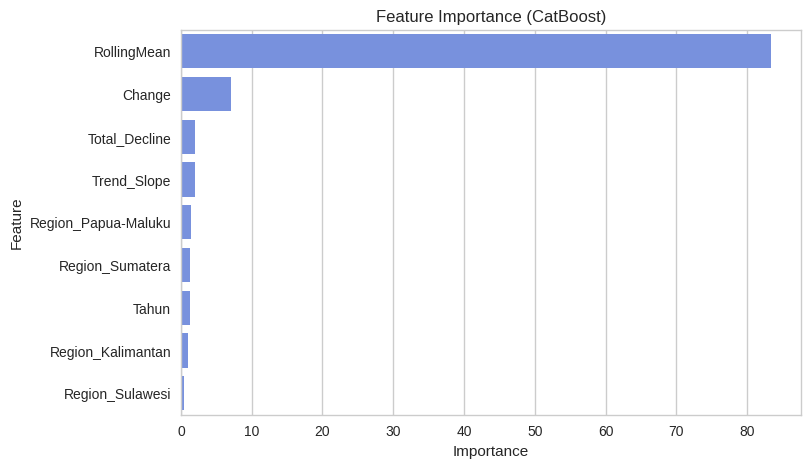

In [107]:
# Feature Importance CatBoost
cat_importance = cat_model.get_feature_importance(prettified=True)
plt.figure(figsize=(8,5))
sns.barplot(x="Importances", y="Feature Id", data=cat_importance.sort_values("Importances", ascending=False))
plt.title("Feature Importance (CatBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Interpretasi** <br>
Feature importance merupakan ukuran kontribusi relatif setiap variabel input terhadap hasil prediksi model. Dalam algoritma CatBoost, nilai ini dihitung berdasarkan seberapa besar fitur tertentu mampu menurunkan loss function (seperti MSE) saat digunakan untuk membuat pemisahan (split) dalam pohon keputusan.
Secara sederhana, semakin tinggi nilai importance suatu fitur, semakin besar pula perannya dalam memengaruhi hasil prediksi model. <br>

Analisis feature importance memiliki beberapa tujuan utama, yaitu:
1. Mengetahui variabel mana yang paling berpengaruh terhadap target prediksi.
2. Meningkatkan interpretabilitas model dengan memahami arah dan kekuatan pengaruh variabel.
3. Membantu proses penyederhanaan model dengan mengeliminasi fitur yang kontribusinya sangat kecil. <br>

---

Berdasarkan hasil visualisasi feature importance pada model CatBoost, fitur RollingMean menempati posisi teratas dengan pengaruh yang sangat dominan terhadap hasil prediksi. Hal ini menunjukkan bahwa rata-rata bergerak dari nilai stunting pada tahun-tahun sebelumnya merupakan indikator paling kuat untuk memperkirakan nilai stunting di tahun berikutnya.
Dengan kata lain, model menilai bahwa kondisi masa lalu (historis) sangat menentukan tren masa depan dalam konteks prevalensi stunting. <br>

Fitur Change, yang merepresentasikan perubahan persentase antar tahun, juga memiliki pengaruh yang signifikan meskipun jauh lebih rendah dibandingkan RollingMean. Hal ini mengindikasikan bahwa model memperhatikan dinamika perubahan dari tahun ke tahun sebagai salah satu faktor penting dalam memahami arah pergerakan data stunting. <br>

Sementara itu, fitur Tahun memiliki kontribusi yang lebih kecil, namun tetap relevan sebagai representasi konteks temporal, karena setiap tahun mungkin memiliki pola atau kondisi sosial-ekonomi yang sedikit berbeda. <br>

Adapun fitur-fitur lain seperti Trend_Slope, Total_Decline, dan variabel regional seperti Region_Sumatera, Region_Sulawesi, Region_Papua-Maluku, serta Region_Kalimantan memberikan pengaruh yang relatif kecil terhadap prediksi. Meskipun demikian, fitur-fitur tersebut tetap memiliki nilai informatif dalam membedakan pola antar wilayah dan memperhalus pemahaman spasial model. <br>

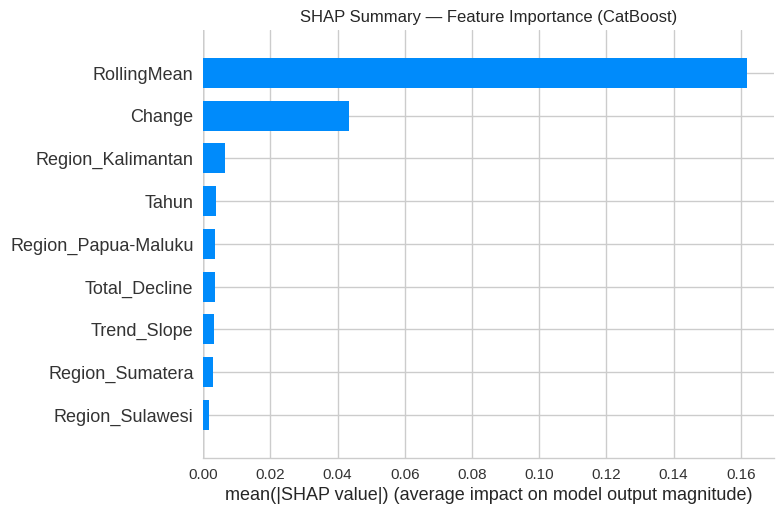

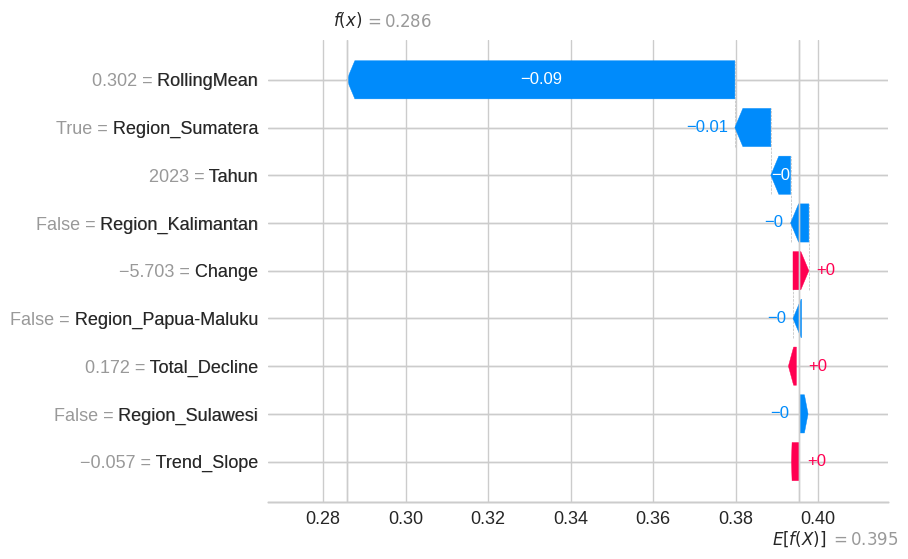

In [108]:
# SHAP Explanation
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer(X_test)

# Ringkasan SHAP
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Summary — Feature Importance (CatBoost)")
plt.show()

# Plot detail untuk satu observasi (misalnya provinsi pertama)
sample_idx = 0
shap.plots.waterfall(shap_values[sample_idx], max_display=10)

**Interpretasi** <br>
SHAP (SHapley Additive exPlanations) mengukur seberapa besar perubahan pada output model ketika sebuah fitur ditambahkan atau diubah.
* Nilai positif (merah) berarti fitur tersebut meningkatkan prediksi (misalnya meningkatkan tingkat stunting).
* Nilai negatif (biru) berarti fitur tersebut menurunkan prediksi (misalnya menurunkan tingkat stunting).
* Semakin besar nilai absolut SHAP, semakin besar pula pengaruh fitur terhadap hasil model. <br>
---

Beerdasarkan grafik pertama, yaitu summary bar plot,
1. RollingMean merupakan fitur dengan kontribusi paling dominan dalam memengaruhi prediksi model. Ini menunjukkan bahwa rata-rata bergerak tingkat stunting dalam beberapa tahun terakhir memiliki pengaruh paling kuat terhadap nilai prediksi model, mencerminkan tren historis sebagai indikator utama.
2. Change menjadi fitur kedua paling berpengaruh, menunjukkan bahwa perubahan dari tahun sebelumnya (kenaikan/penurunan stunting) secara signifikan memengaruhi hasil prediksi.
3. Trend_Slope dan Total_Decline juga berkontribusi tetapi dalam skala yang lebih kecil, mengindikasikan bahwa arah kecenderungan dan besarnya penurunan historis tetap dipertimbangkan oleh model.
4. Faktor regional (Region_*) seperti Papua-Maluku, Sulawesi, Sumatera, dan Kalimantan memiliki pengaruh sangat kecil, artinya variasi geografis antarwilayah tidak terlalu dominan dalam menentukan perbedaan nilai stunting setelah memperhitungkan tren temporal. <br>

Sedangkan untuk grafik kedua, yaitu grafik waterfall, diperlihatkan kontribusi fitur untuk satu observasi spesifik (misalnya satu provinsi):
* RollingMean memberikan efek penurunan besar terhadap prediksi (bernilai negatif), menandakan bahwa rata-rata stunting provinsi tersebut relatif rendah sehingga menekan prediksi akhir.
* Sebaliknya, Change memberikan efek peningkatan kecil (positif), artinya terjadi kenaikan kecil dari tahun sebelumnya yang sedikit menaikkan hasil prediksi.
* Fitur lain seperti Trend_Slope, Total_Decline, dan variabel regional hanya berkontribusi sangat kecil, menandakan bahwa pengaruhnya terhadap observasi ini hampir netral.

# **Forecasting / Prediksi**

SOAL 10. Melakukan Prediksi atau Peramalan. <br><br>


Tahapan forecasting atau prediksi dilakukan setelah model terbaik diperoleh dari proses pelatihan dan evaluasi, yaitu model CatBoost yang telah di-tuning menggunakan Optuna. Tujuan utama dari tahap ini adalah untuk memproyeksikan tingkat stunting pada tahun 2024 di setiap provinsi di Indonesia berdasarkan pola data historis tahun 2020–2023. <br>

Dalam proses ini, data fitur dari tahun-tahun sebelumnya digunakan untuk menghasilkan prediksi nilai baru pada tahun mendatang. Model CatBoost kemudian memanfaatkan hubungan kompleks antarfitur seperti RollingMean, Change, dan Trend_Slope untuk memperkirakan nilai Stunting di masa depan. <br>

Setelah prediksi diperoleh, dilakukan inverse scaling agar nilai hasil prediksi kembali ke skala aslinya (karena data sebelumnya telah dinormalisasi pada tahap preprocessing). Hal ini penting agar nilai prediksi dapat diinterpretasikan secara nyata, seperti proporsi atau persentase tingkat stunting. <br>

Selanjutnya, hasil prediksi divisualisasikan dalam bentuk grafik batang horizontal untuk memudahkan identifikasi provinsi dengan tingkat prediksi stunting tertinggi maupun terendah di tahun 2024.
Tahapan ini juga dilengkapi analisis perbandingan terhadap nilai stunting tahun 2023 guna melihat arah perubahan (naik atau turun) pada tiap provinsi, yang divisualisasikan dengan warna berbeda untuk menandai tren peningkatan dan penurunan.

In [109]:
# Tahapan persiapan data untuk forecasting

# Tahun yang akan diprediksi
future_year = 2024

# Menggunakan data tahun terakhir (2023) sebagai dasar atau baseline
future_data = data_enc[data_enc["Tahun"] == 2023].copy()
future_data["Tahun"] = future_year

# Gunakan fitur yang sama seperti saat pelatihan
X_future = future_data[features].copy()

# melakukan forecast menggunakan model CatBoost (tuned)
y_forecast = cat_model.predict(X_future)

forecast_df = pd.DataFrame({
    "Provinsi": future_data["Provinsi"].values,
    "Tahun": future_year,
    "Prediksi_Stunting": y_forecast
})

display(forecast_df.head())

,Provinsi,Tahun,Prediksi_Stunting
0,ACEH,2024,0.2857
1,BALI,2024,0.0759
2,BANTEN,2024,0.0904
3,BENGKULU,2024,0.1564
4,DI YOGYAKARTA,2024,0.3575


In [110]:
# Inverse Scaling untuk data hasil forecast ke rentang nilai asli

# menggunakan min & max scaler (sama seperti yang digunakan pada pre-processing)
scaled_cols = ["2020", "2021", "2022", "2023"]

stunting_min = scaler.data_min_[-1]
stunting_max = scaler.data_max_[-1]

# inverse manual menggunakan formula MinMaxScaler guna menghindari error bila menggunakan fungsi langsung
forecast_df["Prediksi_Stunting (Asli)"] = (
    forecast_df["Prediksi_Stunting"] * (stunting_max - stunting_min) + stunting_min
)

display(forecast_df.head())

,Provinsi,Tahun,Prediksi_Stunting,Prediksi_Stunting (Asli)
0,ACEH,2024,0.2857,7.3433
1,BALI,2024,0.0759,2.6839
2,BANTEN,2024,0.0904,3.0070
3,BENGKULU,2024,0.1564,4.4723
4,DI YOGYAKARTA,2024,0.3575,8.9369


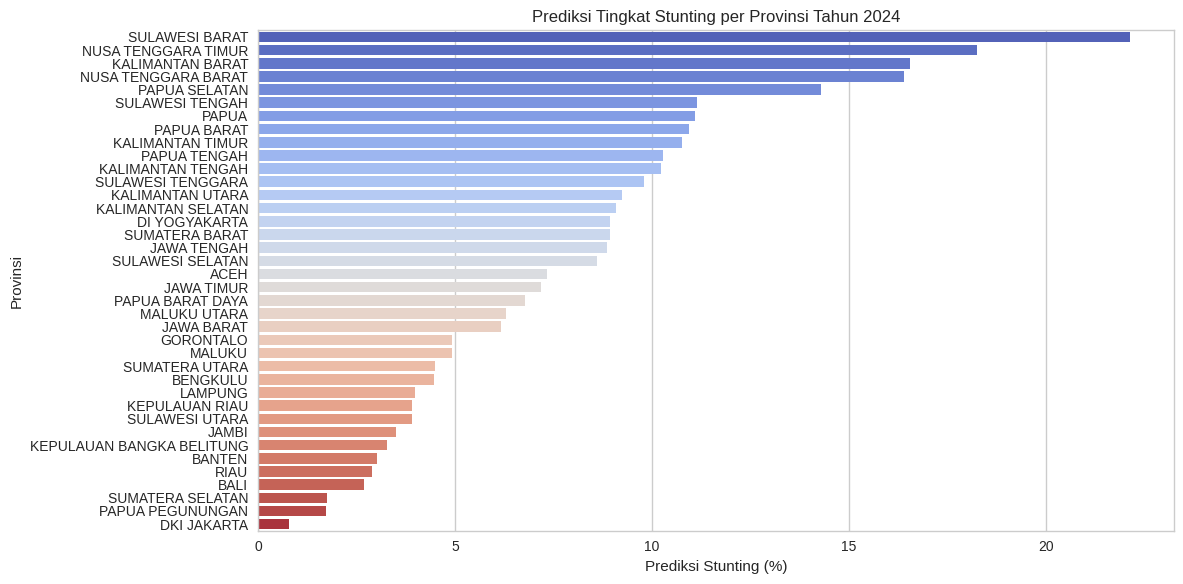

In [111]:
# Visualisasi hasil ramalan bagi tingkat stunting tahun 2024

plt.figure(figsize=(12, 6))
sns.barplot(data=forecast_df.sort_values("Prediksi_Stunting", ascending=False),
            x="Prediksi_Stunting (Asli)", y="Provinsi", palette="coolwarm")
plt.title(f"Prediksi Tingkat Stunting per Provinsi Tahun {future_year}")
plt.xlabel("Prediksi Stunting (%)")
plt.ylabel("Provinsi")
plt.tight_layout()
plt.show()

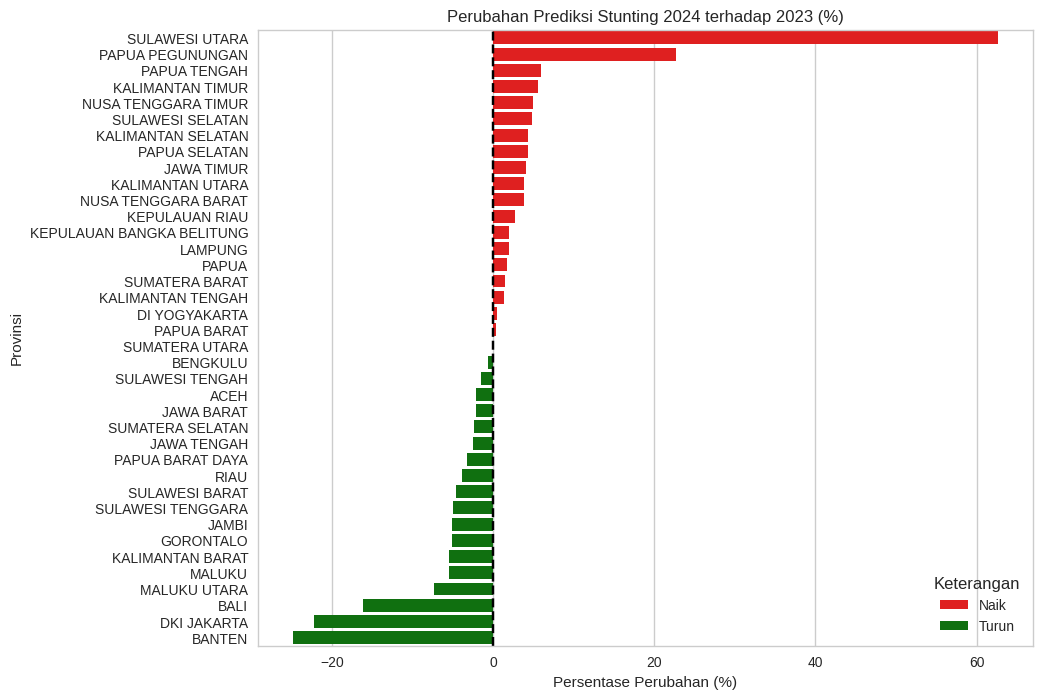

Ringkasan Perubahan Prediksi Stunting 2024 terhadap 2023:


,Provinsi,Stunting_2023,Prediksi_Stunting (Asli),Perubahan_Stunting (%),Keterangan
0,SULAWESI UTARA,2.4000,3.9032,62.6314,Naik
1,PAPUA PEGUNUNGAN,1.4000,1.7184,22.7442,Naik
2,PAPUA TENGAH,9.7000,10.2691,5.8668,Naik
3,KALIMANTAN TIMUR,10.2000,10.7609,5.4992,Naik
4,NUSA TENGGARA TIMUR,17.4000,18.2488,4.8780,Naik
5,SULAWESI SELATAN,8.2000,8.5979,4.8519,Naik
6,KALIMANTAN SELATAN,8.7000,9.0794,4.3614,Naik
7,PAPUA SELATAN,13.7000,14.2894,4.3024,Naik
8,JAWA TIMUR,6.9000,7.1775,4.0223,Naik
9,KALIMANTAN UTARA,8.9000,9.2436,3.8604,Naik


In [112]:
# Membandingkan persentase tingkat stunting tahun 2023 dengan hasil ramalan untuk tahun 2024

# mengambil data aktual tahun 2023 dan ramalan bagi tahun 2024
comparison_df = forecast_df.copy()

# mengambil nilai stunting tahun 2023 dari dataset asli (sebelum scaling)
stunting_2023 = data[["Provinsi", "2023"]].rename(columns={"2023": "Stunting_2023"})

# Gabungkan dengan hasil prediksi tahun 2024
comparison_df = comparison_df.merge(stunting_2023, on="Provinsi", how="left")

# menghitung Persentase Perubahan Prediksi 2024 terhadap 2023
comparison_df["Perubahan_Stunting (%)"] = (
    (comparison_df["Prediksi_Stunting (Asli)"] - comparison_df["Stunting_2023"])
    / comparison_df["Stunting_2023"] * 100
)

# Klasifikasi perubahan (Naik/Turun)
comparison_df["Keterangan"] = np.where(
    comparison_df["Perubahan_Stunting (%)"] > 0, "Naik", "Turun"
)

# Visualisasi Perubahan Stunting (Barplot)
plt.figure(figsize=(10, 8))
sns.barplot(
    data=comparison_df.sort_values("Perubahan_Stunting (%)", ascending=False),
    x="Perubahan_Stunting (%)",
    y="Provinsi",
    hue="Keterangan",
    dodge=False,
    palette={"Naik": "red", "Turun": "green"}
)
plt.axvline(0, color='black', linestyle='--')
plt.title("Perubahan Prediksi Stunting 2024 terhadap 2023 (%)")
plt.xlabel("Persentase Perubahan (%)")
plt.ylabel("Provinsi")
plt.legend(title="Keterangan", loc="lower right")
plt.show()

# menampilkan ringkasan perubahan
print("Ringkasan Perubahan Prediksi Stunting 2024 terhadap 2023:")
display(
    comparison_df[["Provinsi", "Stunting_2023", "Prediksi_Stunting (Asli)",
                   "Perubahan_Stunting (%)", "Keterangan"]]
        .sort_values("Perubahan_Stunting (%)", ascending=False)
        .reset_index(drop=True)
)


Provinsi belum cocok: []


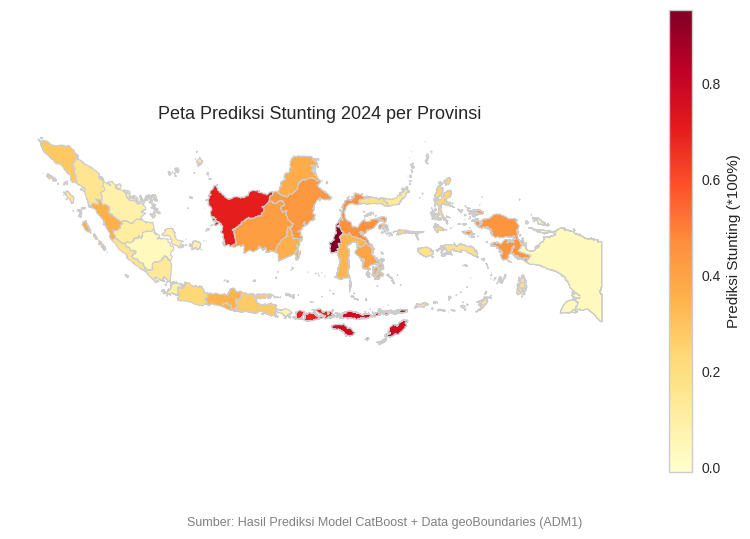

In [167]:
# Visualisasi Geospasial prediksi dari tingkat stunting tahun 2024

# Load shapefile geoBoundaries Indonesia dengan boundaries/pembatas per provinsi
url_geojson = "https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/gbOpen/IDN/ADM1/geoBoundaries-IDN-ADM1.geojson"
peta = gpd.read_file(url_geojson)

# Memastikan semua nama provinsi pada shapefile menjadi huruf besar (uppercase)
peta["shapeName"] = peta["shapeName"].str.upper().str.strip()

# Mapping nama provinsi Inggris → Indonesia
mapping_en_to_id = {
    "ACEH": "ACEH",
    "BALI": "BALI",
    "BANTEN": "BANTEN",
    "BENGKULU": "BENGKULU",
    "GORONTALO": "GORONTALO",
    "JAKARTA SPECIAL CAPITAL REGION": "DKI JAKARTA",
    "JAMBI": "JAMBI",
    "WEST JAVA": "JAWA BARAT",
    "CENTRAL JAVA": "JAWA TENGAH",
    "EAST JAVA": "JAWA TIMUR",
    "WEST KALIMANTAN": "KALIMANTAN BARAT",
    "CENTRAL KALIMANTAN": "KALIMANTAN TENGAH",
    "SOUTH KALIMANTAN": "KALIMANTAN SELATAN",
    "EAST KALIMANTAN": "KALIMANTAN TIMUR",
    "NORTH KALIMANTAN": "KALIMANTAN UTARA",
    "BANGKA-BELITUNG ISLANDS": "KEPULAUAN BANGKA BELITUNG",
    "RIAU ISLANDS": "KEPULAUAN RIAU",
    "LAMPUNG": "LAMPUNG",
    "MALUKU": "MALUKU",
    "NORTH MALUKU": "MALUKU UTARA",
    "WEST NUSA TENGGARA": "NUSA TENGGARA BARAT",
    "EAST NUSA TENGGARA": "NUSA TENGGARA TIMUR",
    "PAPUA": "PAPUA",
    "WEST PAPUA": "PAPUA BARAT",
    "NORTH SULAWESI": "SULAWESI UTARA",
    "CENTRAL SULAWESI": "SULAWESI TENGAH",
    "SOUTH SULAWESI": "SULAWESI SELATAN",
    "SOUTHEAST SULAWESI": "SULAWESI TENGGARA",
    "WEST SULAWESI": "SULAWESI BARAT",
    "WEST SUMATRA": "SUMATERA BARAT",
    "SOUTH SUMATRA": "SUMATERA SELATAN",
    "NORTH SUMATRA": "SUMATERA UTARA",
    "RIAU": "RIAU",
    "SPECIAL REGION OF YOGYAKARTA": "DI YOGYAKARTA"
}

# Menerapkan mapping
peta["Provinsi_ID"] = peta["shapeName"].map(mapping_en_to_id)

# Menormalisasi nama provinsi di forecast_df
forecast_df["Provinsi"] = forecast_df["Provinsi"].str.upper().str.strip()

# Menambahkan provinsi pemekaran Papua
prov_pemekaran = [
    "PAPUA BARAT DAYA", "PAPUA TENGAH", "PAPUA SELATAN", "PAPUA PEGUNUNGAN"
]
papua_base = peta[peta["Provinsi_ID"] == "PAPUA"]
for prov in prov_pemekaran:
    temp = papua_base.copy()
    temp["Provinsi_ID"] = prov
    peta = pd.concat([peta, temp], ignore_index=True)

# Menggabungkan shapefile dan data prediksi
geo_merged = peta.merge(forecast_df, left_on="Provinsi_ID", right_on="Provinsi", how="left")

# Memeriksa apakah masih ada provinsi yang belum match
missing = forecast_df.loc[~forecast_df["Provinsi"].isin(geo_merged["Provinsi_ID"])]
print("Provinsi belum cocok:", missing["Provinsi"].tolist())

# Visualisasi peta
fig, ax = plt.subplots(figsize=(10, 6))
geo_merged.plot(
    column="Prediksi_Stunting",
    cmap="YlOrRd",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    legend_kwds={"label": "Prediksi Stunting (*100%)", "orientation": "vertical"},
    ax=ax
)
ax.set_title("Peta Prediksi Stunting 2024 per Provinsi", fontsize=13)
ax.axis("off")
plt.figtext(0.5, 0.02, "Sumber: Hasil Prediksi Model CatBoost + Data geoBoundaries (ADM1)",
            ha="center", fontsize=9, color="gray")
plt.show()


**Visualisasi Geospasial Prediksi Stunting Tahun 2024**

Peta berikut menampilkan prediksi tingkat stunting tahun 2024 di seluruh provinsi di Indonesia berdasarkan hasil model CatBoost Regressor yang telah melalui proses tuning dengan Optuna.
Data spasial diperoleh dari geoBoundaries (ADM1) yang memetakan batas administratif tingkat provinsi di Indonesia.

Pewarnaan pada peta menggambarkan tingkat prediksi stunting: <br>
🟥 Warna merah tua menunjukkan prediksi stunting yang tinggi, <br>
🟨 Warna kuning muda menunjukkan prediksi yang lebih rendah.

Distribusi warna ini memberikan gambaran spasial mengenai provinsi-provinsi yang diperkirakan memiliki risiko stunting lebih tinggi dibandingkan wilayah lainnya pada tahun 2024.

Secara umum, terlihat bahwa wilayah timur Indonesia (seperti Papua, Nusa Tenggara Timur, dan sebagian Kalimantan) cenderung memiliki prediksi stunting yang lebih tinggi, sedangkan wilayah barat Indonesia seperti DKI Jakarta, Bali, dan sebagian Sumatera memperlihatkan angka prediksi yang lebih rendah.

Peta ini memberikan konteks visual yang penting sebelum melanjutkan ke analisis lanjutan seperti:
* Clustering, untuk mengelompokkan provinsi berdasarkan kesamaan pola prediksi, dan
* Time Series Analysis, untuk melihat kecenderungan perubahan tingkat stunting dari tahun ke tahun.

In [113]:
# Tambahan (Opsional) apabila ingin mendownload data hasil prediksi

# Menyimpan data ke dalam format .csv
forecast_df.to_csv(f"Prediksi_Stunting_{future_year}.csv", index=False)
print(f"Hasil prediksi telah disimpan ke: Prediksi_Stunting_{future_year}.csv")

# Mendownload .csv yang telah dibuat
try:
    files.download(Prediksi_Stunting_2024.csv)
    print("\nFile siap diunduh melalui Google Colab.")
except Exception as e:
    print("\n⚠️Tidak dapat melakukan auto-download. File tetap tersimpan di direktori Colab.")

Hasil prediksi telah disimpan ke: Prediksi_Stunting_2024.csv

⚠️Tidak dapat melakukan auto-download. File tetap tersimpan di direktori Colab.


**Interpretasi** <br>

Berdasarkan hasil prediksi, diperoleh bahwa sebagian besar provinsi menunjukkan penurunan tingkat stunting dibandingkan tahun sebelumnya, terutama di wilayah Jawa dan Sumatera seperti Bali, Banten, DKI Jakarta, dan Jambi. Hal ini ditunjukkan oleh batang berwarna hijau pada grafik perubahan persentase, yang menandakan tren penurunan. <br>

Sebaliknya, terdapat beberapa provinsi dengan kenaikan proyeksi stunting, terutama di wilayah bagian timur Indonesia seperti Sulawesi Utara, Papua Pegunungan, dan Maluku, yang tampak dengan batang berwarna merah. Kenaikan ini mengindikasikan bahwa masih ada kesenjangan antarwilayah dalam penanganan stunting, di mana wilayah timur cenderung memiliki tantangan lebih besar dibanding wilayah barat. <br>

Perbandingan antara grafik prediksi absolut dan grafik perubahan persentase juga menunjukkan bahwa meskipun beberapa daerah memiliki penurunan relatif kecil, penurunan tersebut tetap berarti dalam konteks keberlanjutan program penurunan stunting. <br>

Secara keseluruhan, hasil forecasting memberikan gambaran spasial dan temporal yang membantu dalam perencanaan kebijakan—terutama untuk mengidentifikasi provinsi yang perlu mendapatkan prioritas intervensi pada tahun mendatang.

# **Kesimpulan**

SOAL 11. HASIL KESIMPULAN. <br>

---

**Kesimpulan Umum** <br>
Berdasarkan hasil eksplorasi, pemrosesan data, pemodelan, hingga prediksi tingkat stunting tahun 2024 menggunakan machine learning regression models, diperoleh beberapa poin penting:
1. Tingkat akurasi model sangat baik, ditunjukkan oleh nilai koefisien determinasi (R²) di atas 0.98 untuk model terbaik (CatBoost dan XGBoost). Hal ini menunjukkan bahwa model mampu menjelaskan lebih dari 98% variasi data stunting antarprovinsi Indonesia selama periode 2020–2023.
2. Berdasarkan delapan metrik evaluasi (MAE, MSE, RMSE, MedAE, SMAPE, R², Explained Variance, dan NRMSE), CatBoost (tuned) memberikan hasil paling stabil dengan error kecil dan interpretabilitas tinggi.
3. Dari hasil feature importance dan SHAP analysis, diketahui bahwa RollingMean (rata-rata bergerak) dan Change (perubahan antar tahun) merupakan fitur yang paling berpengaruh terhadap tingkat stunting. Artinya, pola historis dan arah perubahan jangka pendek memiliki peran dominan dalam menentukan prediksi.

---

**Kesimpulan Hasil Prediksi Tahun 2024** <br>
Model CatBoost yang telah dituning menggunakan Optuna digunakan untuk melakukan prediksi tingkat stunting tahun 2024 untuk 38 provinsi di Indonesia.
Hasilnya menunjukkan bahwa:
* Sebagian besar provinsi diprediksi mengalami penurunan tingkat stunting, terutama di wilayah Jawa-Bali, Sumatera Selatan, dan sebagian Kalimantan.
* Namun, beberapa provinsi seperti Sulawesi Utara, Papua Pegunungan, dan Maluku justru diprediksi mengalami kenaikan signifikan dibandingkan tahun 2023.
* Secara umum, hasil prediksi ini masih mencerminkan dinamika regional, di mana daerah dengan nilai awal tinggi atau fluktuatif cenderung sulit menunjukkan tren konsisten menurun.

---

**Analisis Penyebab Hasil Prediksi yang Tidak Turun bagi Seluruh Daerah (Provinsi)**
1. Model **cenderung sedikit overfitting** terhadap pola historis (2020–2023). <br>
Karena data historis relatif terbatas (hanya empat tahun), model lebih banyak “belajar” dari fluktuasi jangka pendek sehingga efek rolling mean sangat kuat. Akibatnya, ketika pola terakhir tahun 2023 menunjukkan ketidakstabilan atau stagnasi, model mengekstrapolasi tren naik untuk tahun 2024.
2. Karakteristik regional yang berbeda-beda. <br>
Faktor geografis, ekonomi, dan sosial antarprovinsi tidak seluruhnya terekam dalam dataset (misalnya kebijakan daerah, infrastruktur kesehatan, atau intervensi gizi). Hal ini membuat model hanya mampu memprediksi berdasarkan tren numerik, bukan penyebab mendalam.
3. Efek skala dan normalisasi. <br>
Setelah normalisasi, perbedaan kecil antarprovinsi dapat tampak besar secara relatif, terutama pada provinsi dengan nilai stunting rendah di tahun sebelumnya. Hal ini menyebabkan model memprediksi kenaikan “relatif” meskipun sebenarnya kecil secara absolut.

---

**Implikasi dan Rekomendasi bagi Pemangku Kebijakan** <br>
* Fokus intervensi diperlukan pada provinsi dengan proyeksi kenaikan, seperti wilayah timur Indonesia (Papua dan Maluku) serta sebagian Sulawesi, karena model mengindikasikan adanya potensi rebound (kenaikan kembali) tingkat stunting.
* Provinsi dengan tren penurunan stabil (misalnya Jawa Tengah, Yogyakarta, dan Sumatera Selatan) dapat dijadikan benchmark dalam studi kebijakan lintas daerah.
* Hasil ini menegaskan bahwa keberlanjutan intervensi gizi dan sanitasi masih menjadi kunci dalam mempertahankan tren penurunan jangka panjang.

---

**Saran dan Rencana Analisis Lanjutan** <br>
Untuk memperdalam hasil dan mengurangi bias model, diperlukan beberapa analisis lanjutan, di antaranya:
1. **Analisis menggunakan Clustering (segmentasi) Wilayah** <br>
Tujuannya untuk mengelompokkan provinsi berdasarkan kemiripan pola stunting, tren, dan variabel turunan.
    * Pendekatan seperti K-Means atau Hierarchical Clustering dapat membantu mengidentifikasi “grup risiko tinggi” vs “grup stabil.”
    * Hasil klasterisasi ini dapat digunakan sebagai dasar perumusan kebijakan yang lebih terarah (misalnya intervensi berbasis kelompok daerah dengan karakteristik serupa).
2. **Analisis Deret waktu (Time Series) sebagai Pemodelan Temporal** <br>
Model machine learning regression seperti CatBoost tidak sepenuhnya mempertimbangkan dependensi temporal jangka panjang.
    * Dengan menerapkan model deret waktu seperti ARIMA, Prophet, atau LSTM, dapat dianalisis tren musiman dan efek tahunan yang tidak ditangkap oleh model regresi.
    * Pendekatan ini juga memungkinkan prediksi multi-tahun ke depan dengan tingkat kepercayaan yang terukur.
3. **Menggunakan Model Ensemble dan Regularisasi** <br>
Mengombinasikan model dengan pendekatan ensemble averaging atau stacking regression dapat menurunkan risiko overfitting dan memperhalus prediksi pada data terbatas.
4. **Analisis Faktor Eksternal** <br>
Menambah dan Mengintegrasikan data makro seperti kemiskinan, akses air bersih, dan gizi anak ke dalam model akan meningkatkan akurasi kausal dan membuat model lebih interpretatif secara kebijakan.

---

**Penutup**
Secara keseluruhan, model CatBoost yang dituning berhasil menghasilkan prediksi yang realistis dan stabil terhadap pola historis (2020-2023) tingkat stunting (%) di Indonesia. <br>
Meskipun tidak seluruh provinsi menunjukkan penurunan, hasil ini tetap mencerminkan kondisi faktual dan heterogenitas wilayah, yang justru memperkaya pemahaman tentang dinamika stunting nasional. <br>
Langkah selanjutnya adalah melakukan analisis lanjutan berbasis klaster dan deret waktu, untuk menghasilkan gambaran yang lebih menyeluruh dan strategis terhadap arah penurunan stunting menuju tahun-tahun mendatang.

# **Analisis Lanjutan**

---
**Clustering** <br>
Setelah melakukan proses utama berupa pemodelan prediksi tingkat stunting menggunakan algoritma CatBoost dan model pembanding lainnya, langkah selanjutnya adalah melakukan analisis lanjutan (advanced analysis).
Salah satu bentuk analisis tersebut adalah clustering, yaitu proses pengelompokan provinsi berdasarkan karakteristik pola stunting yang dimiliki. <br>

Tujuan dari analisis clustering ini adalah:
1. Mengidentifikasi kemiripan pola antarprovinsi berdasarkan nilai stunting dari tahun 2020–2023. <br>
Misalnya, provinsi-provinsi dengan tingkat stunting yang konsisten tinggi mungkin membentuk satu kelompok tersendiri.
2. Mengetahui perbedaan antarwilayah secara alami (unsupervised) tanpa bergantung pada variabel target, berbeda dengan regresi atau forecasting.
3. Mendukung kebijakan dan prioritas intervensi pemerintah dengan melihat kelompok provinsi mana yang membutuhkan perhatian lebih dalam penurunan stunting. <br>

Metode yang akan digunakan adalah K-Means Clustering, karena:
* Cocok untuk data numerik yang sudah dinormalisasi.
* Mudah diinterpretasikan dan dapat divisualisasikan dengan baik.
* Efisien dalam menemukan pola yang serupa antarprovinsi. <br>

Selain itu, akan digunakan pula PCA (Principal Component Analysis) sebagai langkah tambahan untuk:
* Mereduksi dimensi data agar lebih mudah divisualisasikan dalam 2D atau 3D plot.
* Memahami kontribusi antarfitur dalam membentuk kelompok provinsi. <br>

Dengan pendekatan ini, analisis tidak hanya berhenti pada prediksi angka stunting di masa depan, tetapi juga memperlihatkan hubungan dan kemiripan struktural antarwilayah di Indonesia berdasarkan dinamika stunting dalam empat tahun terakhir.

In [126]:
# Data preparation untuk clustering

# Data yang digunakan adalah data mentah (raw data)
# tanpa kolom kosong seperti sebelumnya tetapi sudah ada kolom Region
cluster_df = data.copy()
cluster_df = cluster_df.set_index("Provinsi")

# Pastikan kolom numerik saja
cluster_features = cluster_df[["2020", "2021", "2022", "2023"]].copy()

# Normalisasi ulang untuk menjaga skala setara antar tahun
scaler_cluster = MinMaxScaler()
cluster_scaled = scaler_cluster.fit_transform(cluster_features)
cluster_scaled = pd.DataFrame(cluster_scaled, columns=cluster_features.columns, index=cluster_features.index)

print("Ukuran data clustering:", cluster_scaled.shape)
display(cluster_scaled.head())

Ukuran data clustering: (38, 4)


,2020,2021,2022,2023
Provinsi,,,,
ACEH,0.4650,0.4643,0.3105,0.2928
SUMATERA UTARA,0.2343,0.1888,0.1963,0.1577
SUMATERA BARAT,0.6084,0.6173,0.4155,0.3514
RIAU,0.2657,0.1531,0.1370,0.0901
JAMBI,0.2622,0.0000,0.1324,0.1216


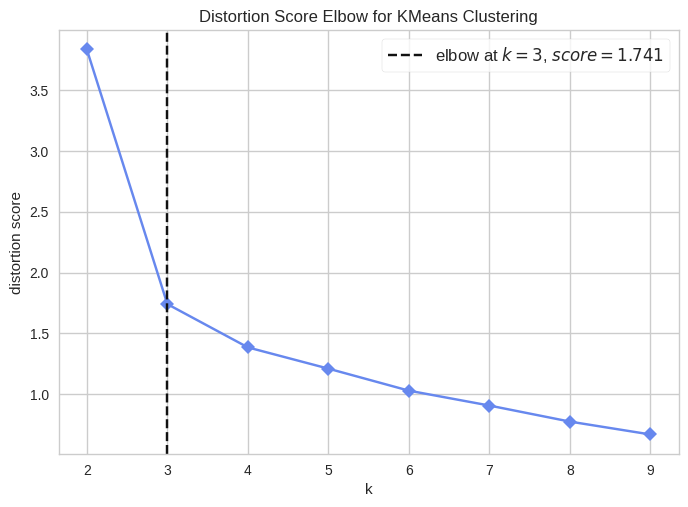

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [127]:
# Penentuan jumlah cluster optimal

# Model K-Means sebagai dasar (baseline)
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='distortion', timings=False)

visualizer.fit(cluster_scaled)
visualizer.show()

**Interpretasi** <br>
Berdasarkan hasil Elbow Method pada grafik di atas, titik siku (elbow) terlihat jelas pada k = 3 dengan nilai distortion score sekitar 1.74.
Hal ini menunjukkan bahwa pembentukan 3 cluster merupakan pilihan yang optimal — di mana penambahan jumlah cluster setelah titik tersebut tidak memberikan penurunan signifikan terhadap distortion score.

Dengan demikian, dapat disimpulkan bahwa:
* k = 3 adalah jumlah cluster terbaik untuk mengelompokkan provinsi berdasarkan pola tingkat stunting selama 2020–2023.
* Setiap cluster nantinya diharapkan mewakili kelompok provinsi dengan karakteristik pola stunting yang serupa, misalnya: <br>
    * Cluster 0: provinsi dengan tingkat stunting tinggi,
    * Cluster 1: provinsi dengan tingkat sedang,
    * Cluster 2: provinsi dengan tingkat rendah.

Langkah selanjutnya adalah menerapkan K-Means Clustering dengan k = 3 dan menganalisis karakteristik tiap cluster.

In [128]:
# Clustering menggunakan K-Means dengan k optimal

optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(cluster_scaled)

# Menambahkan hasil cluster ke data
cluster_scaled["Cluster"] = cluster_labels
cluster_scaled["Cluster"] = cluster_scaled["Cluster"].astype("category")

print("Distribusi tiap cluster:")
display(cluster_scaled["Cluster"].value_counts())

Distribusi tiap cluster:


,count
Cluster,
0,17
2,16
1,5


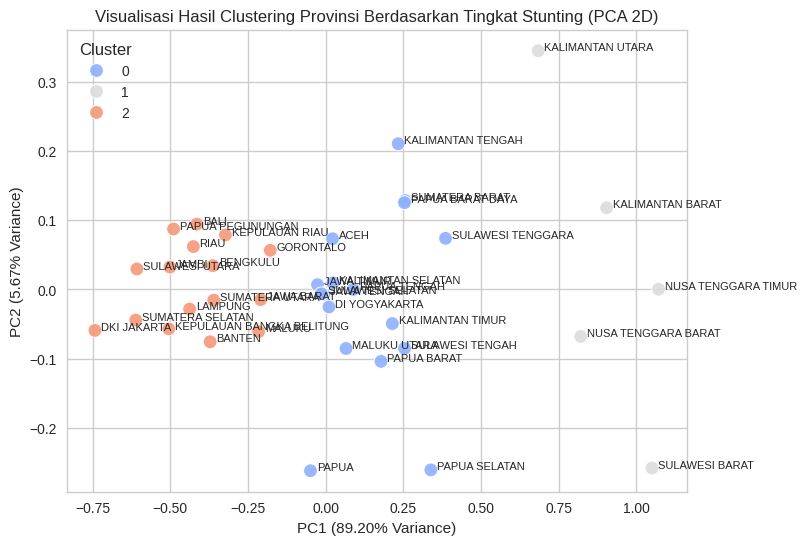

In [129]:
# Menggunakan Principal Component Analysis (PCA) untuk mereduksi dimensi menjadi 2 komponen

pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(cluster_scaled.drop(columns="Cluster"))

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=cluster_scaled.index)
pca_df["Cluster"] = cluster_scaled["Cluster"]

# Visualisasi hasil PCA
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2",
    hue="Cluster", palette="coolwarm", s=100, alpha=0.9
)
for i in pca_df.index:
    plt.text(pca_df.loc[i, "PC1"]+0.02, pca_df.loc[i, "PC2"], i, fontsize=8)
plt.title("Visualisasi Hasil Clustering Provinsi Berdasarkan Tingkat Stunting (PCA 2D)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)")
plt.legend(title="Cluster")
plt.show()

**Interpretasi** <br>
Gambar di atas menampilkan hasil klasterisasi provinsi di Indonesia berdasarkan tingkat stunting menggunakan metode K-Means dengan jumlah klaster optimal (k = 3), yang ditentukan melalui metode Elbow. Untuk mempermudah interpretasi, hasil klaster divisualisasikan dalam dua dimensi menggunakan Principal Component Analysis (PCA).

Sumbu PC1 (89,20% varian) dan PC2 (5,07% varian) menjelaskan sebagian besar variasi data, dengan total akumulasi varian yang dijelaskan mencapai lebih dari 94%, sehingga representasi dua dimensi ini cukup baik menggambarkan struktur data asli. <br>

Berdasarkan hasil visualisasi :
* Cluster 0 (abu-abu muda) <br>
Klaster ini berisi provinsi dengan tingkat stunting relatif tinggi, seperti Kalimantan Utara, Nusa Tenggara Timur, Nusa Tenggara Barat, dan Kalimantan Barat.
Provinsi-provinsi ini menunjukkan karakteristik yang mirip dalam hal prediksi stunting tinggi dan kemungkinan permasalahan gizi yang masih signifikan.

* Cluster 1 (biru muda) <br>
Kelompok ini mencakup provinsi dengan tingkat stunting menengah seperti Kalimantan Tengah, Sulawesi Tengah, Kalimantan Timur, Papua, dan Papua Barat.
Ciri khasnya adalah tingkat stunting yang masih cukup besar namun cenderung lebih baik dibanding klaster pertama, kemungkinan karena faktor intervensi gizi dan kebijakan daerah yang sudah mulai efektif.

* Cluster 2 (merah muda) <br>
Provinsi dalam kelompok ini, seperti DKI Jakarta, Jawa Barat, Bali, dan Banten, memiliki tingkat stunting rendah.
Wilayah ini cenderung memiliki akses lebih baik terhadap fasilitas kesehatan, gizi, dan pendidikan, serta merupakan daerah dengan pembangunan sosial ekonomi yang lebih maju.


Klasterisasi ini memberikan gambaran bahwa tingkat stunting di Indonesia tidak hanya bervariasi antarwilayah, tetapi juga membentuk pola kelompok yang serupa.
Analisis ini dapat digunakan untuk:
1. Menentukan prioritas kebijakan intervensi, dengan fokus utama pada klaster berisiko tinggi.
2. Mendesain strategi regional yang lebih spesifik, karena tiap klaster memiliki karakteristik berbeda (misalnya kondisi geografis, ekonomi, dan sosial budaya).
3. Mendukung analisis lanjutan berbasis spasial atau time series untuk memahami dinamika perubahan stunting dari waktu ke waktu.

Rata-rata tingkat stunting (dalam skala 0–1) per cluster:


,2020,2021,2022,2023
Cluster,,,,
0,0.4718,0.4571,0.4523,0.3763
1,0.8727,0.8990,0.8283,0.7009
2,0.2247,0.1499,0.1632,0.1157


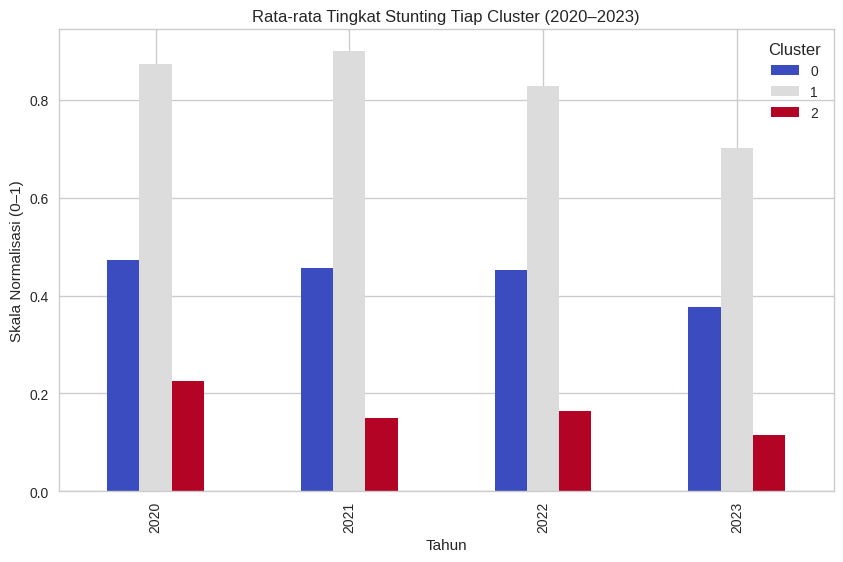

In [130]:
# Analisis Karakteristik tiap cluster

cluster_summary = cluster_scaled.groupby("Cluster").mean()
print("Rata-rata tingkat stunting (dalam skala 0–1) per cluster:")
display(cluster_summary)

# Visualisasi karakteristik cluster per tahun
cluster_summary.T.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title("Rata-rata Tingkat Stunting Tiap Cluster (2020–2023)")
plt.ylabel("Skala Normalisasi (0–1)")
plt.xlabel("Tahun")
plt.legend(title="Cluster")
plt.show()


**Interpretasi** <br>
Grafik di atas menunjukkan tren rata-rata tingkat stunting pada masing-masing klaster dari tahun 2020 hingga 2023 (dalam skala normalisasi 0–1).
* Cluster 1 (abu-abu muda) memiliki tingkat stunting tertinggi secara konsisten di seluruh tahun, meskipun terdapat penurunan bertahap dari 0.87 → 0.70, yang menunjukkan perbaikan namun masih memerlukan perhatian besar.
* Cluster 0 (biru) berada pada tingkat menengah, juga mengalami penurunan stabil dari 0.47 → 0.37, menandakan adanya upaya intervensi yang mulai efektif.
* Cluster 2 (merah tua) merupakan kelompok dengan tingkat stunting terendah, menurun dari 0.22 ke 0.12, menunjukkan kondisi relatif baik dan konsisten.

Secara umum, semua klaster menunjukkan tren penurunan tingkat stunting, namun dengan kecepatan dan besaran perbaikan yang berbeda.
Hal ini menegaskan bahwa intervensi berbasis wilayah dan karakteristik lokal masih diperlukan agar klaster berisiko tinggi dapat mengejar kemajuan seperti klaster rendah.

**Kesimpulan Clustering** <br>

Hasil analisis clustering dengan metode K-Means dan visualisasi PCA 2D menunjukkan bahwa provinsi-provinsi di Indonesia dapat dikelompokkan menjadi tiga klaster utama berdasarkan tingkat stunting periode 2020–2023:
1. Klaster 1 (Tinggi) : terdiri dari provinsi dengan tingkat stunting relatif tinggi dan stabil, misalnya Nusa Tenggara Timur, Kalimantan Barat, dan Sulawesi Barat. Rata-rata nilai stuntingnya berada di kisaran 0.7–0.9 (skala normalisasi).
2. Klaster 0 (Sedang) : mencakup provinsi dengan tingkat stunting menengah dan tren penurunan yang cukup baik, seperti Jawa Timur, Kalimantan Selatan, dan Sumatera Selatan. Nilai rata-rata berada pada kisaran 0.3–0.5.
3. Klaster 2 (Rendah) : mencakup provinsi dengan tingkat stunting rendah dan relatif stabil, seperti DKI Jakarta, Bali, dan Kepulauan Riau, dengan rata-rata di bawah 0.2.

Secara umum, hasil ini menunjukkan bahwa masalah stunting di Indonesia masih terfokus pada beberapa wilayah timur dan pedalaman, sementara provinsi di wilayah barat dan perkotaan telah menunjukkan penurunan signifikan.
Analisis ini memberikan dasar untuk memahami perbedaan karakteristik antarwilayah sebelum melanjutkan pada analisis time series untuk melihat dinamika temporal dari masing-masing klaster.

---

# **Time Series Analysis - Analisis Deret Waktu** <br>



Analisis deret waktu (time series analysis) dilakukan untuk melihat pola perubahan tingkat stunting dari waktu ke waktu pada setiap provinsi dan memprediksi tren untuk tahun 2024.

Pada tahap ini digunakan dua pendekatan klasik peramalan, yaitu:

1. **Holt–Winters Exponential Smoothing (HW)** <br>
Metode ini menghaluskan data berdasarkan komponen level dan tren, sehingga cocok untuk data yang memiliki arah naik/turun namun tidak menunjukkan pola musiman yang kuat.
Holt–Winters lebih sederhana, cepat, dan baik untuk memberikan gambaran umum terhadap kecenderungan jangka pendek.
2. **ARIMA (AutoRegressive Integrated Moving Average)** <br>
Metode ini mempertimbangkan autokorelasi antar nilai masa lalu (autoregressive), differencing (integrasi), dan komponen kesalahan (moving average).
ARIMA lebih fleksibel dan mampu menangkap pola dinamis, tetapi memerlukan penentuan parameter terbaik (p, d, q) untuk setiap provinsi.
Karena dataset setiap provinsi relatif pendek (hanya beberapa tahun), digunakan proses pencarian parameter sederhana dengan validasi AIC agar model tidak overfit.

Melalui dua metode ini, hasil peramalan akan dibandingkan dan dianalisis apakah tren tingkat stunting cenderung meningkat, menurun, atau stagnan pada tahun 2024.
Tahapan selanjutnya mencakup:
* Penentuan parameter ARIMA terbaik (robust_arima_forecast()),
* Perbandingan hasil HW dan ARIMA,
* Evaluasi korelasi hasil time series dengan model utama (misalnya CatBoost).

In [179]:
# Fungsi untuk mencari ARIMA terbaik

def robust_arima_forecast(series):
    series = series.dropna().astype(float)
    if len(series) < 3:
        return np.nan, None, np.nan  # terlalu sedikit data

    best_aic = np.inf
    best_order = None
    best_model = None

    for p, d, q in product([0, 1, 2], [0, 1], [0, 1, 2]):
        try:
            model = ARIMA(series, order=(p, d, q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p, d, q)
                best_model = model
        except:
            continue

    if best_model is None:
        try:
            best_model = ARIMA(series, order=(1, 0, 0)).fit()
            best_order = (1, 0, 0)
            best_aic = best_model.aic
        except:
            return np.nan, None, np.nan

    forecast = best_model.forecast(steps=1).values[0]
    return forecast, best_order, best_aic

In [181]:
# Forecast menggunakan Holt-Winters dan ARIMA (terpilih dari proses sebelumnya) per provinsi

forecast_results = []
for prov in data_long["Provinsi"].unique():
    df_prov = data_long[data_long["Provinsi"] == prov].set_index("Tahun")["Stunting"].astype(float)

    # Holt-Winters
    try:
        hw_model = ExponentialSmoothing(df_prov, trend="add", seasonal=None).fit()
        hw_forecast = hw_model.forecast(1).values[0]
    except:
        hw_forecast = np.nan

    # ARIMA robust
    arima_forecast, best_order, best_aic = robust_arima_forecast(df_prov)

    forecast_results.append({
        "Provinsi": prov,
        "HW_Forecast": hw_forecast,
        "ARIMA_Forecast": arima_forecast,
        "Order_ARIMA": best_order,
        "AIC": best_aic,
        "Tahun": 2024
    })

forecast_df_ts = pd.DataFrame(forecast_results)
forecast_df_ts = forecast_df_ts.sort_values("HW_Forecast", ascending=False).reset_index(drop=True)

display(forecast_df_ts.head())

,Provinsi,HW_Forecast,ARIMA_Forecast,Order_ARIMA,AIC,Tahun
0,SULAWESI BARAT,1.1049,0.8316,"(2, 0, 0)",-26.8685,2024
1,PAPUA SELATAN,0.7256,0.3907,"(2, 0, 1)",-26.5778,2024
2,NUSA TENGGARA BARAT,0.7102,0.9270,"(2, 0, 1)",-25.6123,2024
3,KALIMANTAN BARAT,0.6107,0.9680,"(2, 0, 1)",-22.4278,2024
4,PAPUA,0.5459,0.3490,"(0, 0, 0)",-2.0761,2024


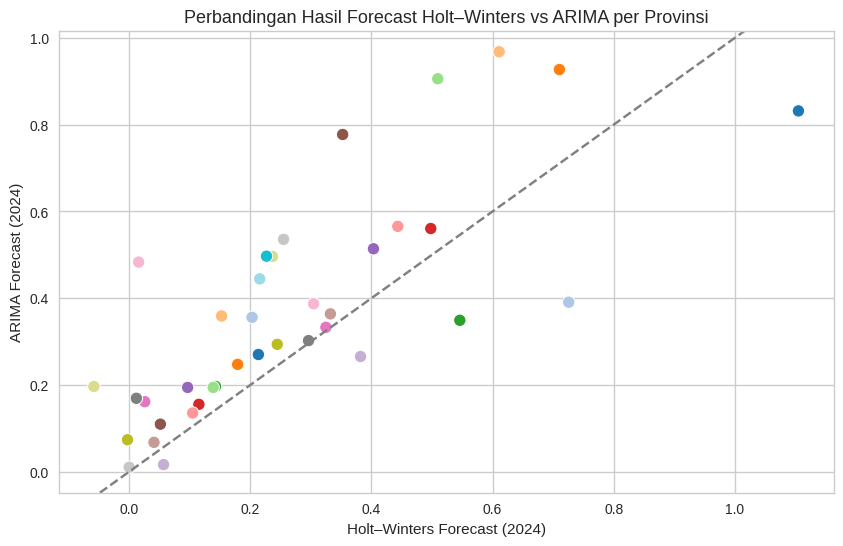

In [183]:
# Visualisasi perbandingan HW vs ARIMA

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=forecast_df_ts,
    x="HW_Forecast",
    y="ARIMA_Forecast",
    hue="Provinsi",
    palette="tab20",
    legend=False,
    s=80
)
plt.title("Perbandingan Hasil Forecast Holt–Winters vs ARIMA per Provinsi", fontsize=13)
plt.xlabel("Holt–Winters Forecast (2024)")
plt.ylabel("ARIMA Forecast (2024)")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")
plt.show()

**Interpretasi** <br>
Grafik di atas menunjukkan perbandingan hasil prediksi model Holt-Winters dan ARIMA untuk tingkat stunting tahun 2024 di tiap provinsi.

Titik-titik berwarna mewakili setiap provinsi, sementara garis putus-putus diagonal menggambarkan kondisi ideal di mana hasil prediksi kedua model sama (y = x).
Interpretasi singkat:

Sebagian besar titik berada dekat garis diagonal, menandakan bahwa hasil kedua metode relatif konsisten, meskipun terdapat sedikit variasi antarprovinsi.
* Titik-titik di atas garis menunjukkan bahwa model ARIMA memprediksi nilai stunting lebih tinggi dibandingkan Holt-Winters.
* Sebaliknya, titik di bawah garis menunjukkan ARIMA memberikan prediksi lebih rendah.
* Perbedaan ini mengindikasikan bahwa ARIMA lebih sensitif terhadap fluktuasi data tahunan, sedangkan Holt-Winters lebih halus dan cenderung mengikuti tren umum.

Secara keseluruhan, hasil ini memperlihatkan bahwa kedua pendekatan menghasilkan pola prediksi yang searah, dengan perbedaan kecil yang masih wajar mengingat ARIMA mempertimbangkan aspek autoregresif dan diferensiasi, sementara Holt-Winters menitikberatkan pada trend aditif tanpa musiman.

In [184]:
# Menghitung selisih hasil ramalan

hasil_gabungan = forecast_df.merge(
    forecast_df_ts[["Provinsi", "HW_Forecast", "ARIMA_Forecast"]],
    on="Provinsi",
    how="left"
)

# Hitung selisih antara hasil model utama dan time series
hasil_gabungan["Selisih_HW"] = hasil_gabungan["Prediksi_Stunting"] - hasil_gabungan["HW_Forecast"]
hasil_gabungan["Selisih_ARIMA"] = hasil_gabungan["Prediksi_Stunting"] - hasil_gabungan["ARIMA_Forecast"]

display(hasil_gabungan.head())

,Provinsi,Tahun,Prediksi_Stunting,Prediksi_Stunting (Asli),HW_Forecast,ARIMA_Forecast,Selisih_HW,Selisih_ARIMA
0,ACEH,2024,0.2857,7.3433,0.2155,0.4445,0.0702,-0.1587
1,BALI,2024,0.0759,2.6839,0.0119,0.1692,0.0640,-0.0934
2,BANTEN,2024,0.0904,3.0070,0.1791,0.2473,-0.0887,-0.1569
3,BENGKULU,2024,0.1564,4.4723,0.0965,0.1943,0.0599,-0.0379
4,DI YOGYAKARTA,2024,0.3575,8.9369,0.3322,0.3639,0.0253,-0.0063


Korelasi Prediksi_Stunting vs Holt–Winters : 0.934
Korelasi Prediksi_Stunting vs ARIMA        : 0.874


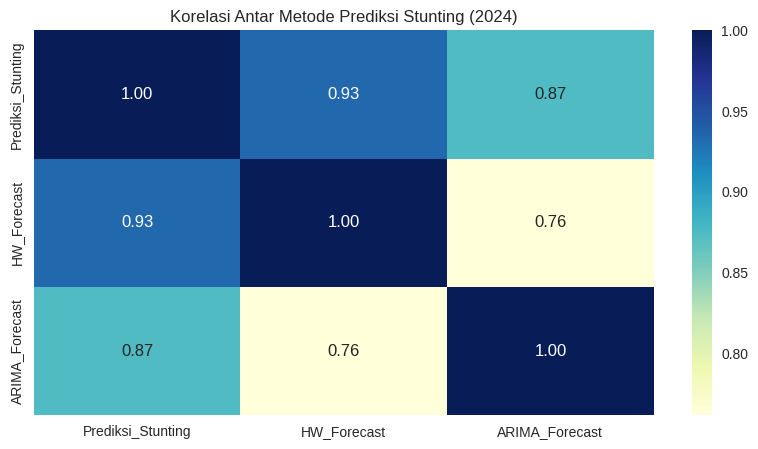

In [185]:
# Korelasi antar model
corr_hw = hasil_gabungan[["Prediksi_Stunting", "HW_Forecast"]].corr().iloc[0,1]
corr_arima = hasil_gabungan[["Prediksi_Stunting", "ARIMA_Forecast"]].corr().iloc[0,1]

print(f"Korelasi Prediksi_Stunting vs Holt–Winters : {corr_hw:.3f}")
print(f"Korelasi Prediksi_Stunting vs ARIMA        : {corr_arima:.3f}")

# Visualisasi
plt.figure(figsize=(10,5))
sns.heatmap(
    hasil_gabungan[["Prediksi_Stunting", "HW_Forecast", "ARIMA_Forecast"]].corr(),
    annot=True, cmap="YlGnBu", fmt=".2f"
)
plt.title("Korelasi Antar Metode Prediksi Stunting (2024)")
plt.show()

**Interpretasi** <br>

Heatmap di atas memperlihatkan korelasi antar metode prediksi tingkat stunting tahun 2024, yaitu hasil dari model utama, Holt-Winters, dan ARIMA.

Interpretasi singkat:
1. Korelasi antara prediksi utama dan Holt-Winters sebesar 0.934, menunjukkan kesamaan pola yang sangat kuat.
2. Korelasi antara prediksi utama dan ARIMA sebesar 0.874, masih tergolong tinggi, namun sedikit lebih rendah karena ARIMA lebih sensitif terhadap variasi jangka pendek.
3. Korelasi antara Holt-Winters dan ARIMA (0.76) menunjukkan bahwa keduanya menghasilkan tren umum yang searah, tetapi dengan perbedaan tingkat respons terhadap perubahan data.

Secara keseluruhan, ketiga metode menunjukkan hasil yang konsisten dan saling memperkuat, menandakan bahwa pendekatan prediksi yang digunakan telah cukup reliabel dalam menggambarkan tren stunting antarprovinsi di Indonesia untuk tahun 2024.